# Import Libraries

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.express as px

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from scipy import stats

In [334]:
def show_distribution(col):
    '''
    This function will make a distribution (graph) and display it    '''

    # Get statistics
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 3 subplots (3 rows, 1 column)
    fig, ax = plt.subplots(3, 1, figsize = (15,15))

    # Plot the histogram   
    sns.histplot(col, ax=ax[0])
    plt.ylabel('Frequency', fontsize=10)

    # Plot the boxplot   
    sns.boxplot(col, orient='h', ax=ax[1])
    plt.xlabel('value', fontsize=10)
    
    # Plot density
    sns.kdeplot(col, ax=ax[2])

    # Show the mean, median, and mode
    plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Minimum')
    plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2, label='Mean')
    plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2, label='Median')
    plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode')
    plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Maximum')
    plt.legend(loc='upper right')
    plt.legend()
    
    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=15)

# Exploratory data Analysis

## Reading and being Familiar with Data

In [335]:
df0 = pd.read_csv('data.csv', sep = ',')
df = df0.copy()

In [336]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors           13.0   
1   50  Self-emp-not-inc   83311  Bachelors           13.0   
2   38           Private  215646    HS-grad            9.0   
3   53           Private  234721       11th            7.0   
4   28           Private  338409  Bachelors           13.0   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [337]:
df.sample(5)

age     workclass  fnlwgt     education  education-num  \
294     27       Private  248402     Bachelors           13.0   
2373    57       Private  205708  Some-college           10.0   
21805   63             ?  146196     Bachelors           13.0   
3395    61  Self-emp-inc  156542   Prof-school           15.0   
351     26       Private  192262       HS-grad            9.0   

           marital-status      occupation   relationship   race     sex  \
294         Never-married    Tech-support      Unmarried  Black  Female   
2373   Married-civ-spouse    Craft-repair        Husband  White    Male   
21805  Married-civ-spouse               ?        Husband  White    Male   
3395            Separated  Prof-specialty  Not-in-family  White    Male   
351    Married-civ-spouse   Other-service        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country salary  
294               0             0              40  United-States  <=50K  
2373              0             0              40         Poland  <=50K  
21805             0             0              40  United-States  <=50K  
3395              0             0              40  United-States   >50K  
351               0             0              40  United-States  <=50K

In [338]:
df.tail(5)

age     workclass  fnlwgt   education  education-num  \
32556   27       Private  257302  Assoc-acdm           12.0   
32557   40       Private  154374     HS-grad            9.0   
32558   58       Private  151910     HS-grad            9.0   
32559   22       Private  201490     HS-grad            9.0   
32560   52  Self-emp-inc  287927     HS-grad            9.0   

           marital-status         occupation relationship   race     sex  \
32556  Married-civ-spouse       Tech-support         Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
32558             Widowed       Adm-clerical    Unmarried  White  Female   
32559       Never-married       Adm-clerical          NaN  White    Male   
32560  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country salary  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K

In [339]:
df.shape

(32561, 15)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [341]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   31759.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.082843   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.576172   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [342]:
df.describe(include='object')

workclass education      marital-status      occupation relationship  \
count      32561     32561               32561           32561        27493   
unique         9        16                   7              15            5   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native-country salary  
count   32561  32561          32561  32561  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29170  24720

In [343]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [344]:
round(df.isnull().sum()/df.shape[0]*100, 2)

age                0.00
workclass          0.00
fnlwgt             0.00
education          0.00
education-num      2.46
marital-status     0.00
occupation         0.00
relationship      15.56
race               0.00
sex                0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     0.00
salary             0.00
dtype: float64

In [345]:
df.duplicated().sum()

24

## Data Preparation

**Rename the columns**

In [346]:
df.columns = df.columns.str.replace('-', '_').str.lower()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

**Checking the Categoric Columns**

In [347]:
df.select_dtypes('object').nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       5
race               5
sex                2
native_country    42
salary             2
dtype: int64

In [348]:
for col in df.select_dtypes('object').columns:
    print(col)
    print('--'*8)
    print(df[col].value_counts(dropna=False))
    print('--'*20)

workclass
----------------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418


## Cleaning the data

In [349]:
df.isin(['?']).any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

**Replace '?' with np.nan**

In [350]:
df.workclass.replace('?', np.nan, inplace=True)
df.occupation.replace('?', np.nan, inplace=True)
df.native_country.replace('?', np.nan, inplace=True)

**Drop the duplicates**

In [351]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(32537, 15)

**Check for missing values**

In [352]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation        1843
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
salary               0
dtype: int64

In [353]:
df[['education', 'education_num']].isnull().sum()

education          0
education_num    802
dtype: int64

In [354]:
pd.crosstab(df.education, df.education_num)

education_num  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0    9.0   10.0  \
education                                                                    
10th              0     0     0     0     0   916     0     0      0     0   
11th              0     0     0     0     0     0  1146     0      0     0   
12th              0     0     0     0     0     0     0   424      0     0   
1st-4th           0   159     0     0     0     0     0     0      0     0   
5th-6th           0     0   329     0     0     0     0     0      0     0   
7th-8th           0     0     0   630     0     0     0     0      0     0   
9th               0     0     0     0   503     0     0     0      0     0   
Assoc-acdm        0     0     0     0     0     0     0     0      0     0   
Assoc-voc         0     0     0     0     0     0     0     0      0     0   
Bachelors         0     0     0     0     0     0     0     0      0     0   
Doctorate         0     0     0     0     0     0     0     0      0     0   
HS-grad           0     0     0     0     0     0     0     0  10208     0   
Masters           0     0     0     0     0     0     0     0      0     0   
Preschool        49     0     0     0     0     0     0     0      0     0   
Prof-school       0     0     0     0     0     0     0     0      0     0   
Some-college      0     0     0     0     0     0     0     0      0  7089   

education_num  11.0  12.0  13.0  14.0  15.0  16.0  
education                                          
10th              0     0     0     0     0     0  
11th              0     0     0     0     0     0  
12th              0     0     0     0     0     0  
1st-4th           0     0     0     0     0     0  
5th-6th           0     0     0     0     0     0  
7th-8th           0     0     0     0     0     0  
9th               0     0     0     0     0     0  
Assoc-acdm        0  1044     0     0     0     0  
Assoc-voc      1343     0     0     0     0     0  
Bachelors         0     0  5245     0     0     0  
Doctorate         0     0     0     0     0   405  
HS-grad           0     0     0     0     0     0  
Masters           0     0     0  1686     0     0  
Preschool         0     0     0     0     0     0  
Prof-school       0     0     0     0   559     0  
Some-college      0     0     0     0     0     0

In [355]:
df[['marital_status', 'relationship']].isnull().sum()

marital_status       0
relationship      5064
dtype: int64

In [356]:
pd.crosstab(df.marital_status, df.relationship)

relationship           Husband  Not-in-family  Other-relative  Unmarried  Wife
marital_status                                                                
Divorced                     0           2403             110       1600     0
Married-AF-spouse            9              0               1          0    12
Married-civ-spouse       13178             17             124          0  1556
Married-spouse-absent        0            211              32        130     0
Never-married                0           4694             611        881     0
Separated                    0            420              55        451     0
Widowed                      0            547              48        383     0

**Dropping unnecessary columns**

In [357]:
drop_columns = ['education_num', 'relationship']

df.drop(drop_columns, axis=1, inplace=True)
df.shape

(32537, 13)

**Dropping missing values**

In [358]:
df.dropna(inplace=True)
df.shape

(30139, 13)

## Bi-Multivariate Analysis

In [359]:
numerical= df.select_dtypes('number').columns.to_list()

categorical = df.drop('salary', axis=1).select_dtypes('object').columns.to_list()

In [360]:
print(numerical)
print()
print(categorical)

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex', 'native_country']


### Salary (Target Feature)

In [361]:
print('nunique :', df.salary.nunique())
print('---'*9)
df.salary.value_counts(dropna=False)

nunique : 2
---------------------------


<=50K    22633
>50K      7506
Name: salary, dtype: int64

In [362]:
df['salary'] = df['salary'].replace({'<=50K': 'below_50K', '>50K': 'above_50K'})
df.salary.value_counts(dropna=False)

below_50K    22633
above_50K     7506
Name: salary, dtype: int64

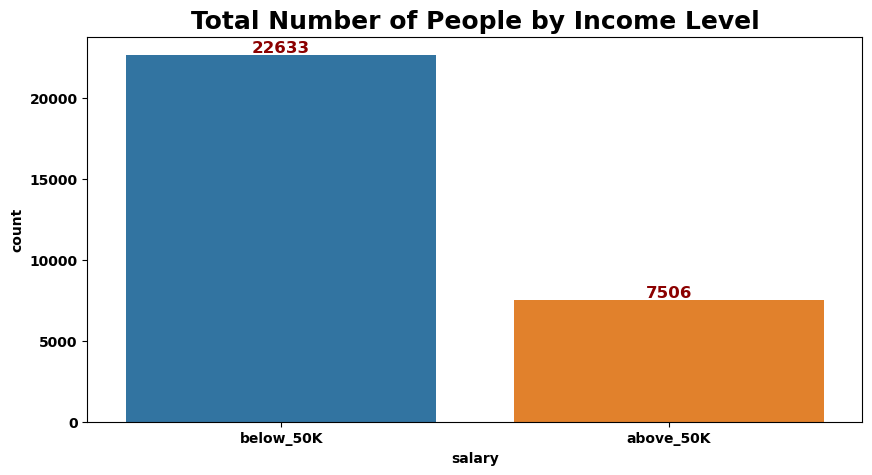

In [363]:
# Visualizing the number of people in each category of 'salary'

fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, 
              x='salary', 
              )

ax.set_title('Total Number of People by Income Level', fontsize=18)

ax.bar_label(ax.containers[0], color='darkred', size=12);

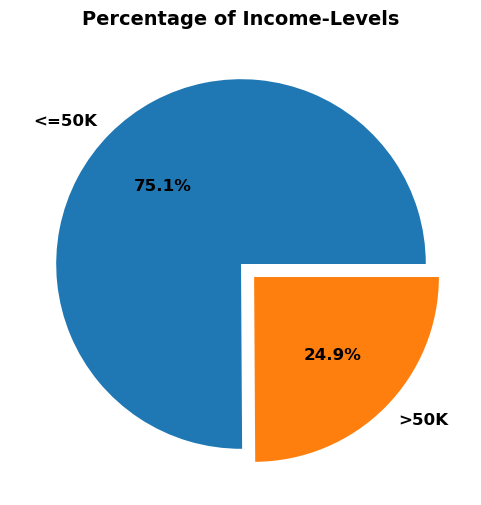

In [364]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.salary.value_counts().values, 
       labels=['<=50K', '>50K'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       textprops={'fontsize': 12}
       )

plt.title('Percentage of Income-Levels', fontdict = {'fontsize': 14})

plt.show()

### Numeric columns

In [365]:
numerical

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

**Age**

In [366]:
print('Range:', np.min(df['age']), '-', np.max(df['age']))
print('---'*8)

df.age.describe()

Range: 17 - 90
------------------------


count    30139.000000
mean        38.441720
std         13.131426
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

Minimum:17.00
Mean:38.44
Median:37.00
Mode:36.00
Maximum:90.00



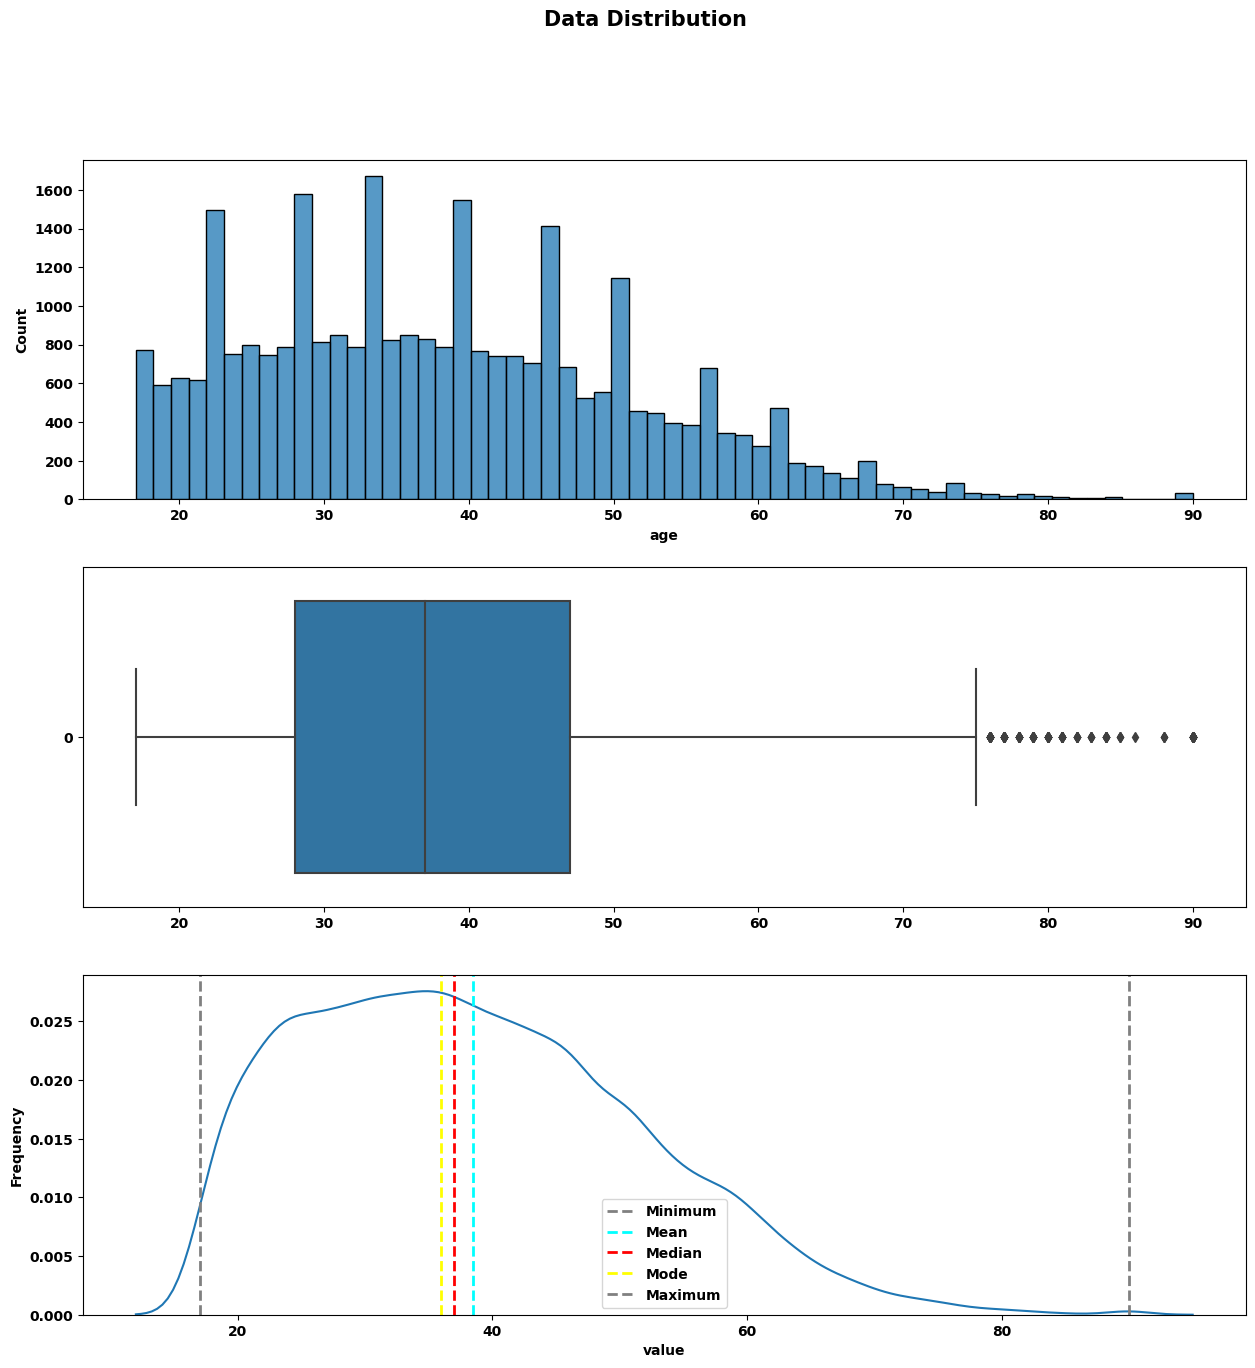

In [367]:
show_distribution(df['age'])

In [368]:
df.groupby('salary')['age'].describe()

count       mean        std   min   25%   50%   75%   max
salary                                                                
above_50K   7506.0  43.960165  10.270746  19.0  36.0  43.0  51.0  90.0
below_50K  22633.0  36.611585  13.460776  17.0  26.0  34.0  45.0  90.0

In [369]:
pd.crosstab(df['age'], df['salary']).iplot(kind='bar', title = 'age and salary')

**fnlwgt**

In [370]:
print('Range:', np.min(df['fnlwgt']), '-', np.max(df['fnlwgt']))
print('---'*8)

df.fnlwgt.describe()

Range: 13769 - 1484705
------------------------


count    3.013900e+04
mean     1.897950e+05
std      1.056586e+05
min      1.376900e+04
25%      1.176275e+05
50%      1.784170e+05
75%      2.376045e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

Minimum:13769.00
Mean:189795.03
Median:178417.00
Mode:203488.00
Maximum:1484705.00



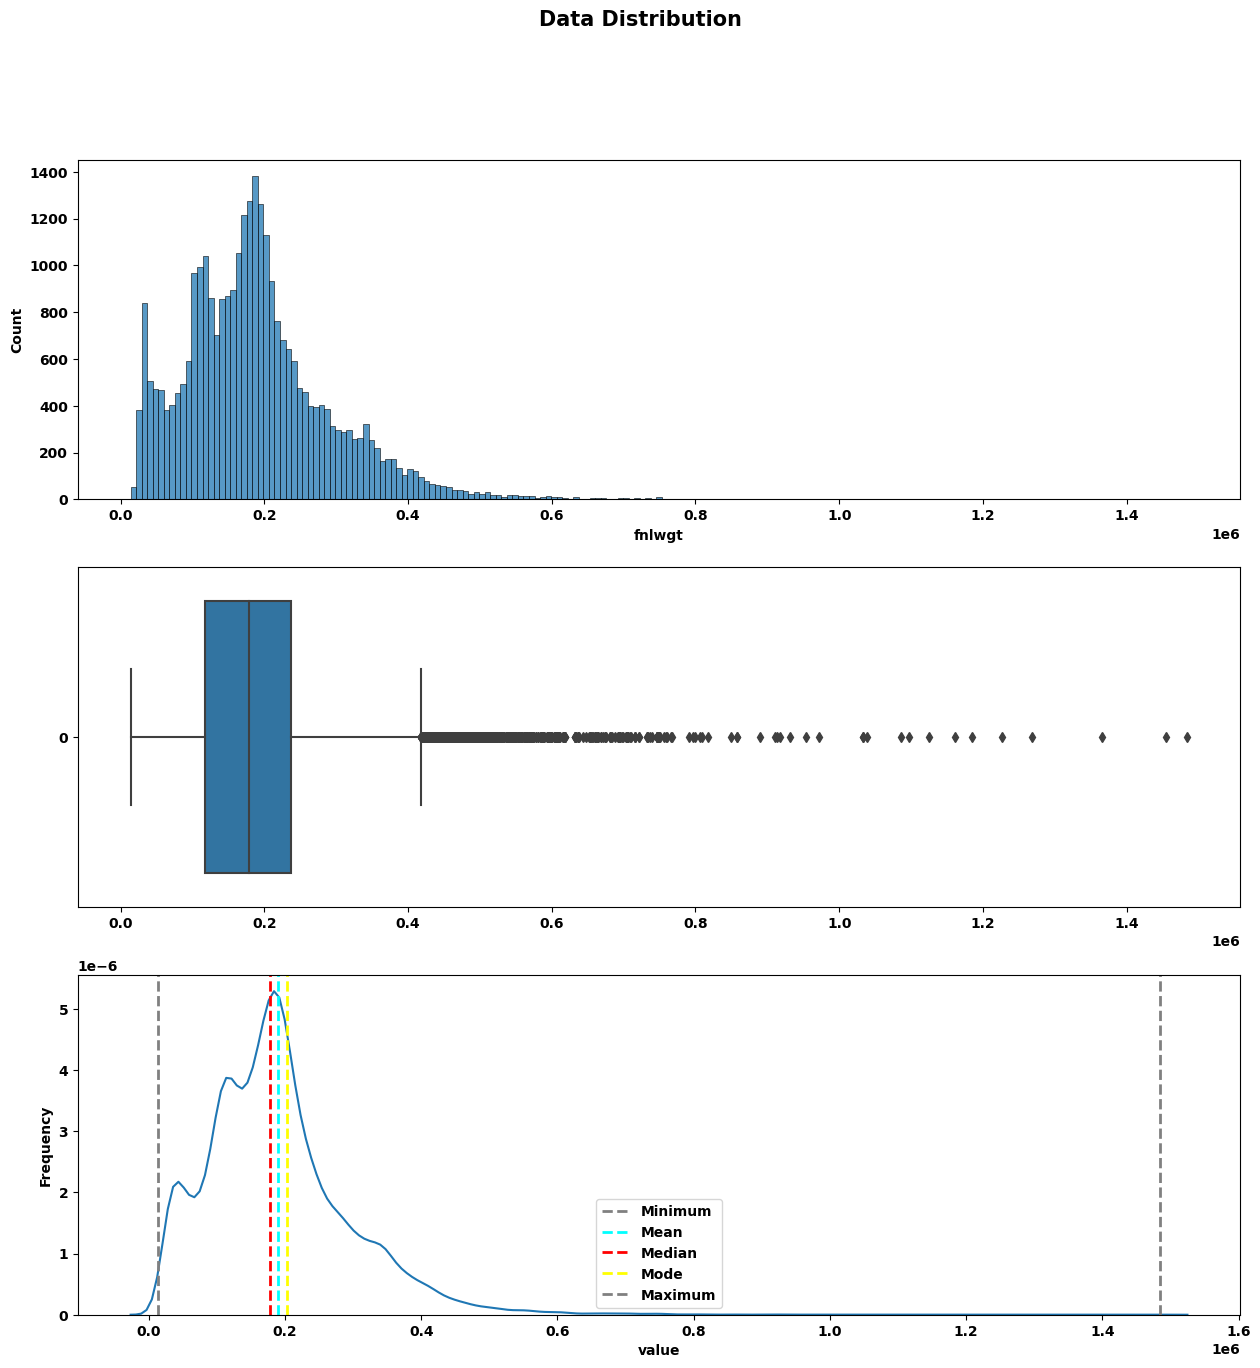

In [371]:
show_distribution(df['fnlwgt'])

In [372]:
df.groupby('salary')['fnlwgt'].describe()

count           mean            std      min       25%       50%  \
salary                                                                          
above_50K   7506.0  188145.280975  102835.033749  14878.0  119099.5  176171.0   
below_50K  22633.0  190342.146821  106575.115669  13769.0  117312.0  179508.0   

                75%        max  
salary                          
above_50K  231092.0  1226583.0  
below_50K  239409.0  1484705.0

In [373]:
pd.crosstab(df['fnlwgt'], df['salary']).iplot(kind='bar', title = 'fnlwgt and salary')

**capital_gain**

In [374]:
print('Range:', np.min(df['capital_gain']), '-', np.max(df['capital_gain']))
print('---'*8)

df.capital_gain.describe()

Range: 0 - 99999
------------------------


count    30139.000000
mean      1092.841202
std       7409.110596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

Minimum:0.00
Mean:1092.84
Median:0.00
Mode:0.00
Maximum:99999.00



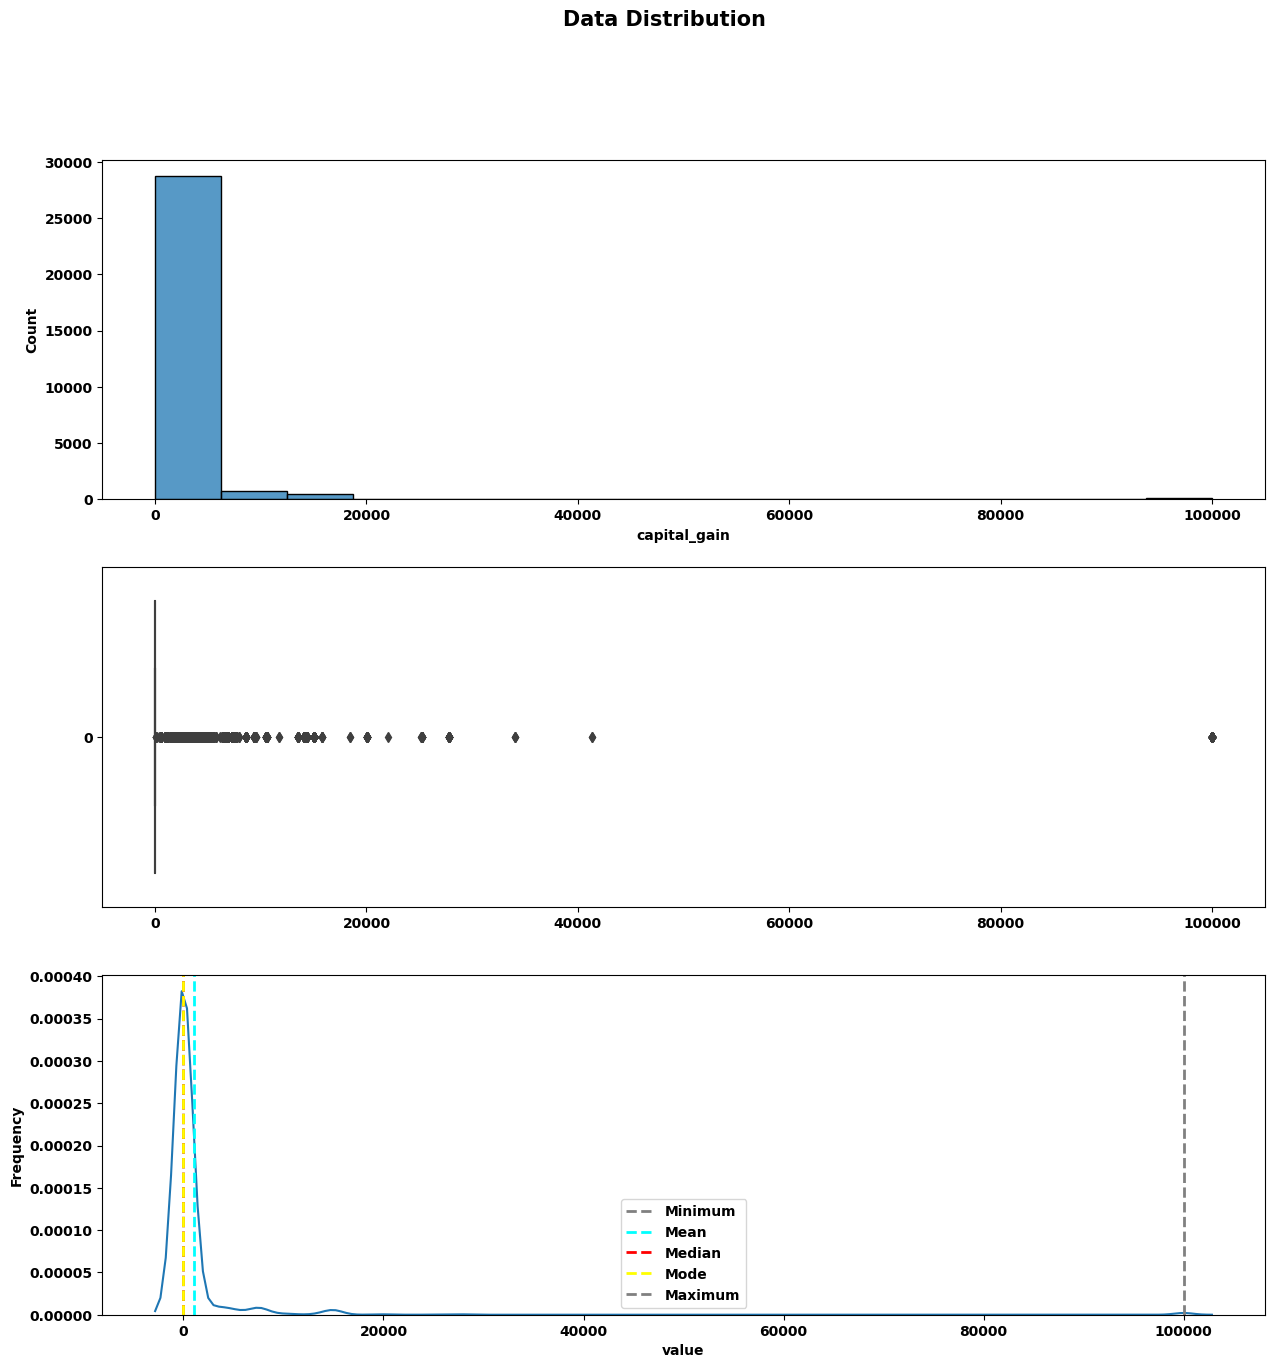

In [375]:
show_distribution(df['capital_gain'])

In [376]:
df.groupby('salary')['capital_gain'].describe()

count         mean           std  min  25%  50%  75%      max
salary                                                                    
above_50K   7506.0  3938.729017  14387.833124  0.0  0.0  0.0  0.0  99999.0
below_50K  22633.0   149.031989    936.815624  0.0  0.0  0.0  0.0  41310.0

In [377]:
pd.crosstab(df['capital_gain'], df['salary']).iplot(kind='bar', title = 'capital_gain and salary')

**capital_loss**

In [378]:
print('Range:', np.min(df['capital_loss']), '-', np.max(df['capital_loss']))
print('---'*8)

df.capital_loss.describe()

Range: 0 - 4356
------------------------


count    30139.000000
mean        88.439928
std        404.445239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

Minimum:0.00
Mean:88.44
Median:0.00
Mode:0.00
Maximum:4356.00



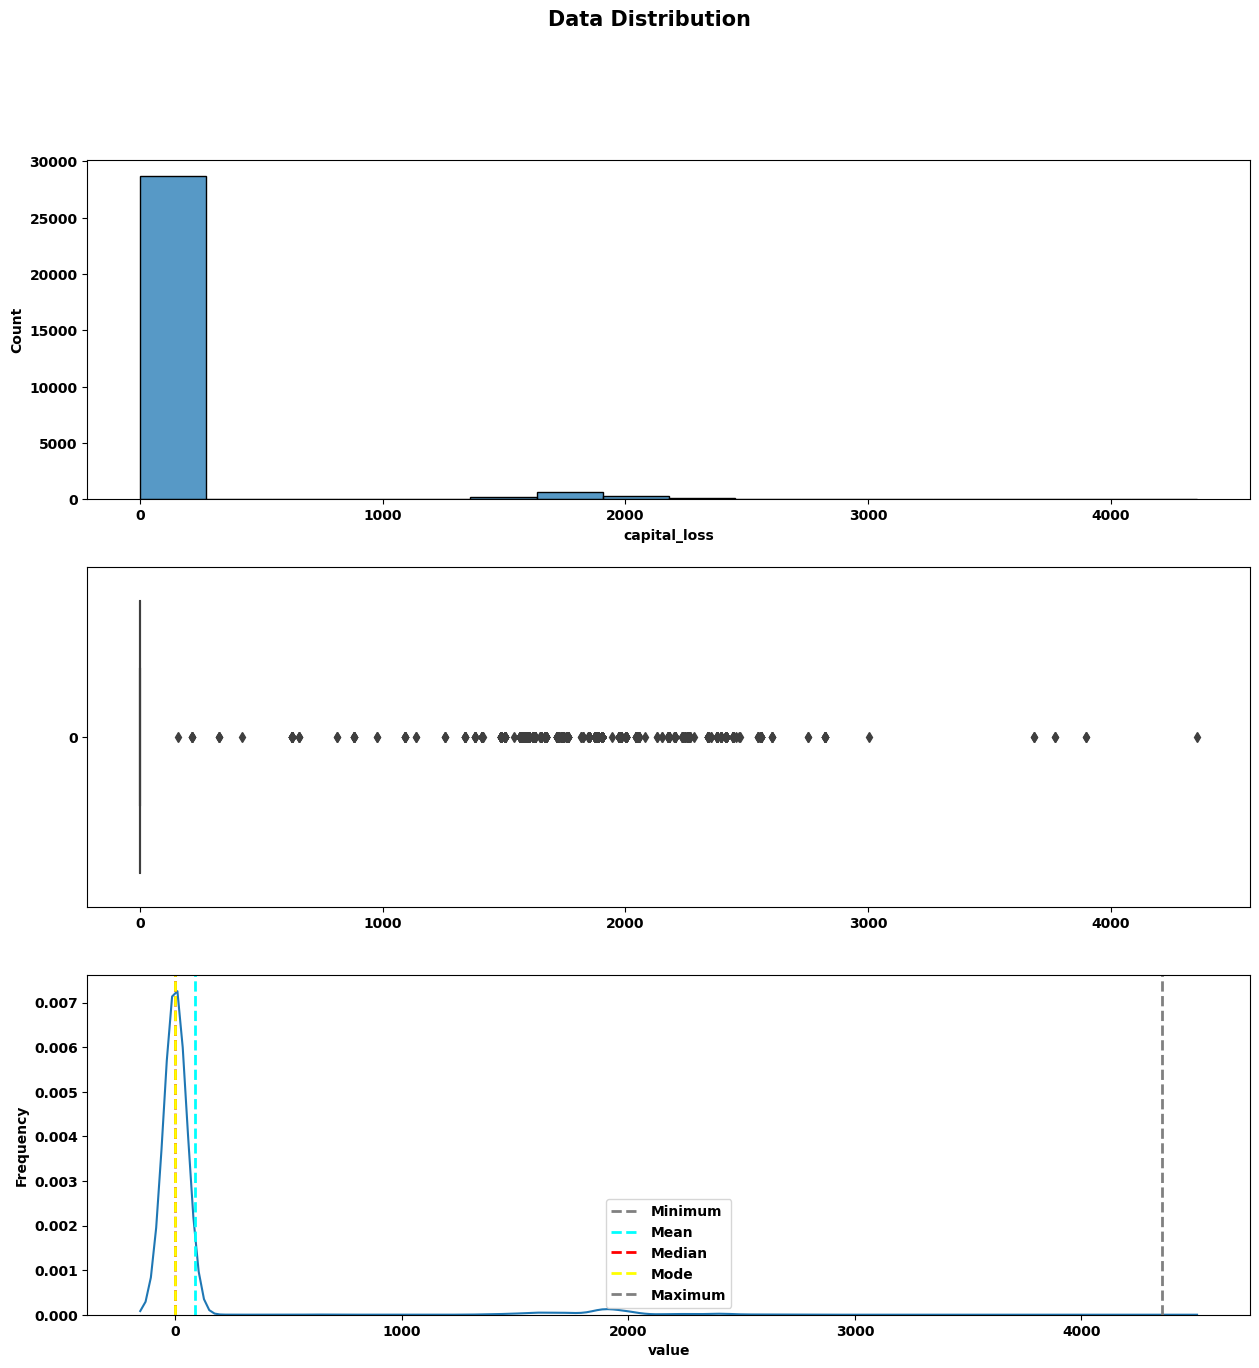

In [379]:
show_distribution(df['capital_loss'])

In [380]:
df.groupby('salary')['capital_loss'].describe()

count        mean         std  min  25%  50%  75%     max
salary                                                                
above_50K   7506.0  193.802292  592.896137  0.0  0.0  0.0  0.0  3683.0
below_50K  22633.0   53.497592  310.409904  0.0  0.0  0.0  0.0  4356.0

In [381]:
pd.crosstab(df['capital_loss'], df['salary']).iplot(kind='bar', title = 'capital_loss and salary')

**hours_per_week**

In [382]:
print('Range:', np.min(df['hours_per_week']), '-', np.max(df['hours_per_week']))
print('---'*8)

df.hours_per_week.describe()

Range: 1 - 99
------------------------


count    30139.000000
mean        40.934703
std         11.978753
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

Minimum:1.00
Mean:40.93
Median:40.00
Mode:40.00
Maximum:99.00



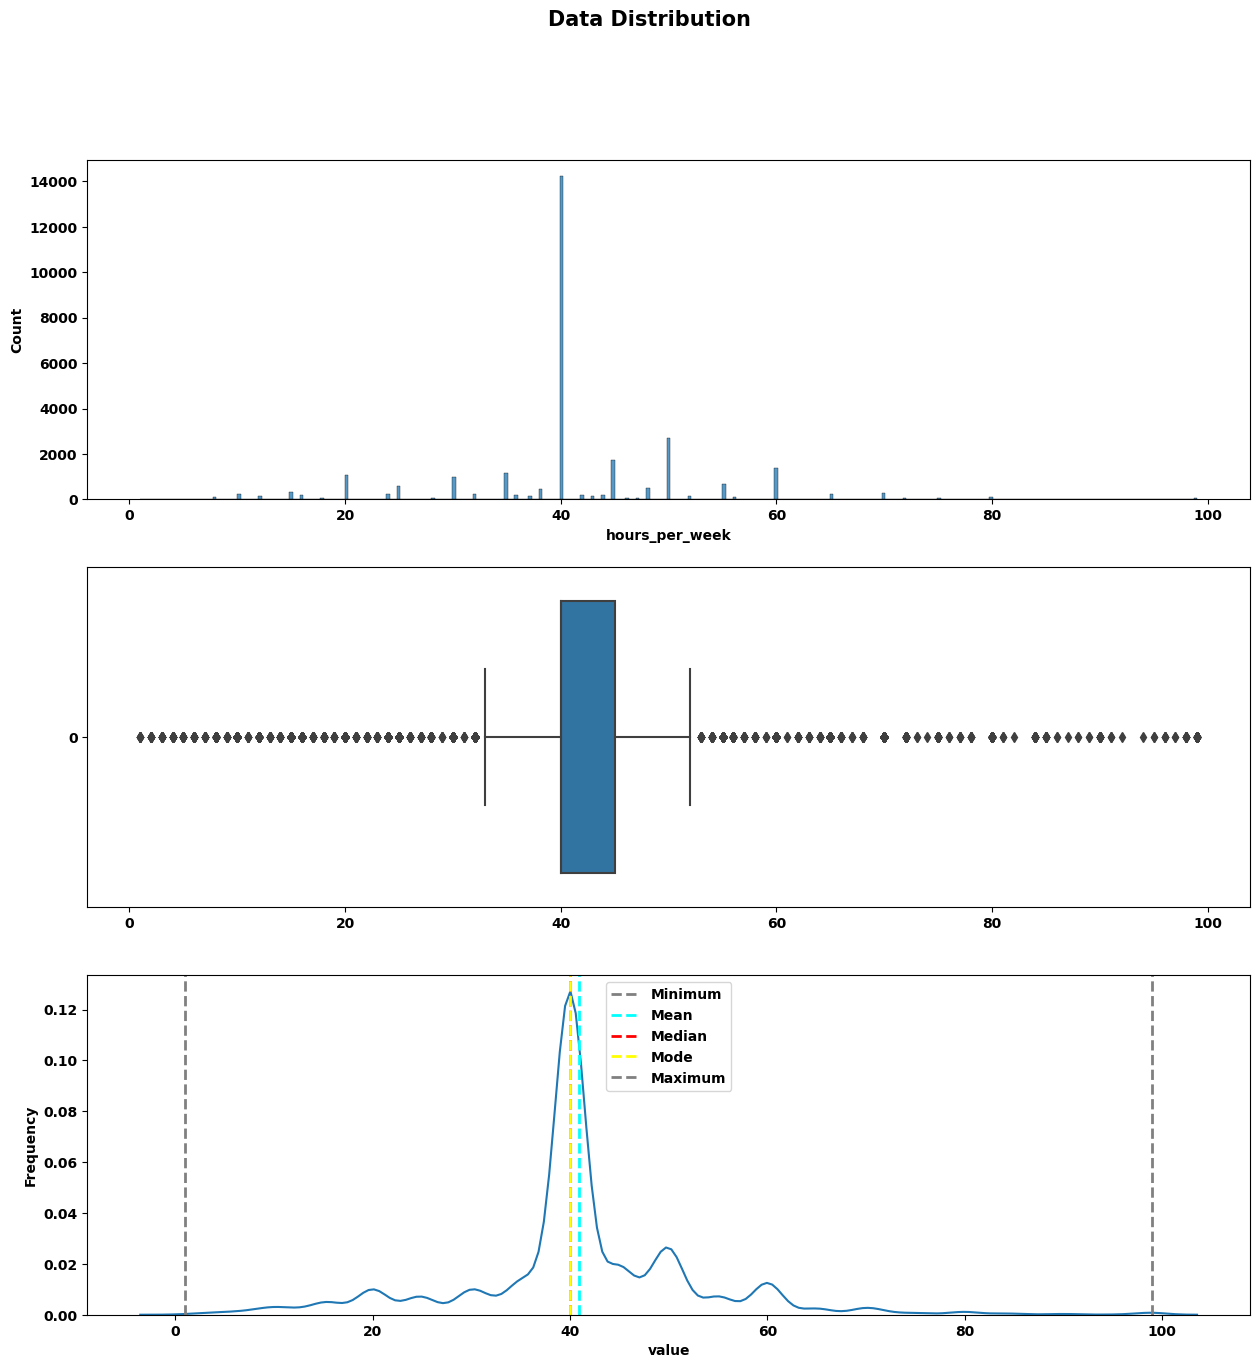

In [383]:
show_distribution(df['hours_per_week'])

In [384]:
df.groupby('salary')['hours_per_week'].describe()

count       mean        std  min   25%   50%   75%   max
salary                                                               
above_50K   7506.0  45.707034  10.738183  1.0  40.0  40.0  50.0  99.0
below_50K  22633.0  39.352008  11.949217  1.0  38.0  40.0  40.0  99.0

In [385]:
pd.crosstab(df['hours_per_week'], df['salary']).iplot(kind='bar', title = 'hours_per_week and salary')

### Categorical columns

In [386]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'race',
 'sex',
 'native_country']

**Workclass**

In [387]:
print('nunique :', df.workclass.nunique())
print('---'*9)

df.workclass.value_counts(dropna=False)

nunique : 7
---------------------------


Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

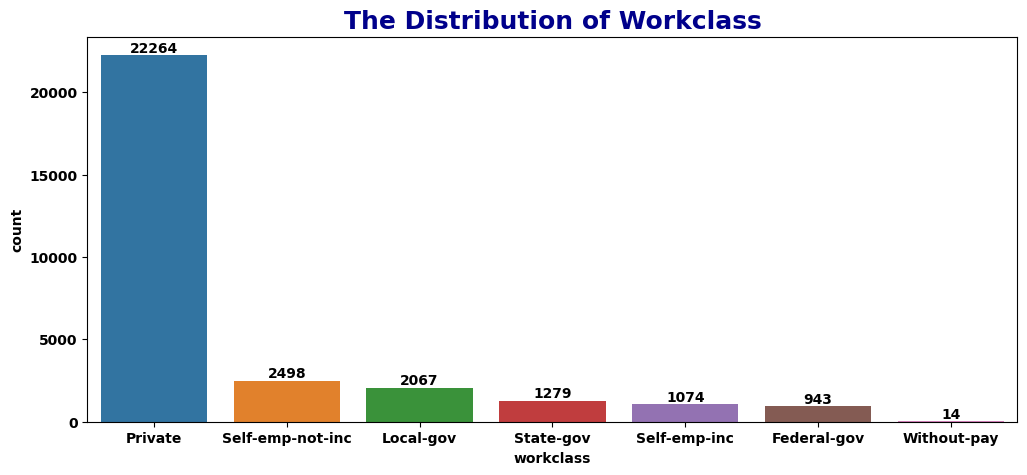

In [388]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, 
                   x='workclass', 
                   order=df['workclass'].value_counts().index)

plt.title('The Distribution of Workclass', fontsize=18, color='darkblue')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

In [389]:
df.workclass.value_counts(normalize=True)

Private             0.738711
Self-emp-not-inc    0.082883
Local-gov           0.068582
State-gov           0.042437
Self-emp-inc        0.035635
Federal-gov         0.031288
Without-pay         0.000465
Name: workclass, dtype: float64

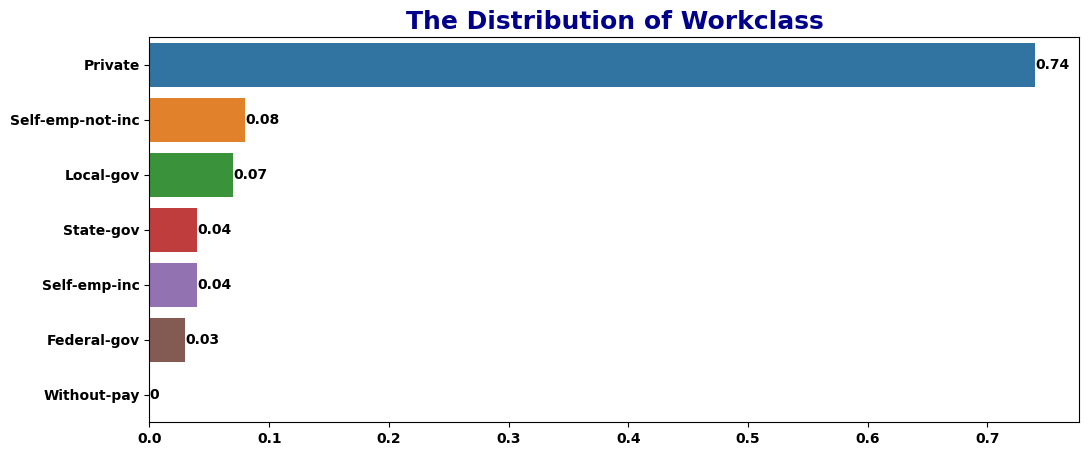

In [390]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df, 
                 x=round(df['workclass'].value_counts(normalize=True),2).values, 
                 y=df['workclass'].value_counts(normalize=True).index)

plt.title('The Distribution of Workclass', fontsize=18, color='darkblue')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

In [391]:
pd.crosstab(df['workclass'], df['salary']).iplot(kind='bar', title = 'workclass and salary')

In [392]:
workclass = df.groupby('workclass').salary.value_counts(normalize=True).reset_index(name='percentage')
workclass

workclass     salary  percentage
0        Federal-gov  below_50K    0.612937
1        Federal-gov  above_50K    0.387063
2          Local-gov  below_50K    0.705370
3          Local-gov  above_50K    0.294630
4            Private  below_50K    0.781082
5            Private  above_50K    0.218918
6       Self-emp-inc  above_50K    0.558659
7       Self-emp-inc  below_50K    0.441341
8   Self-emp-not-inc  below_50K    0.714171
9   Self-emp-not-inc  above_50K    0.285829
10         State-gov  below_50K    0.731040
11         State-gov  above_50K    0.268960
12       Without-pay  below_50K    1.000000

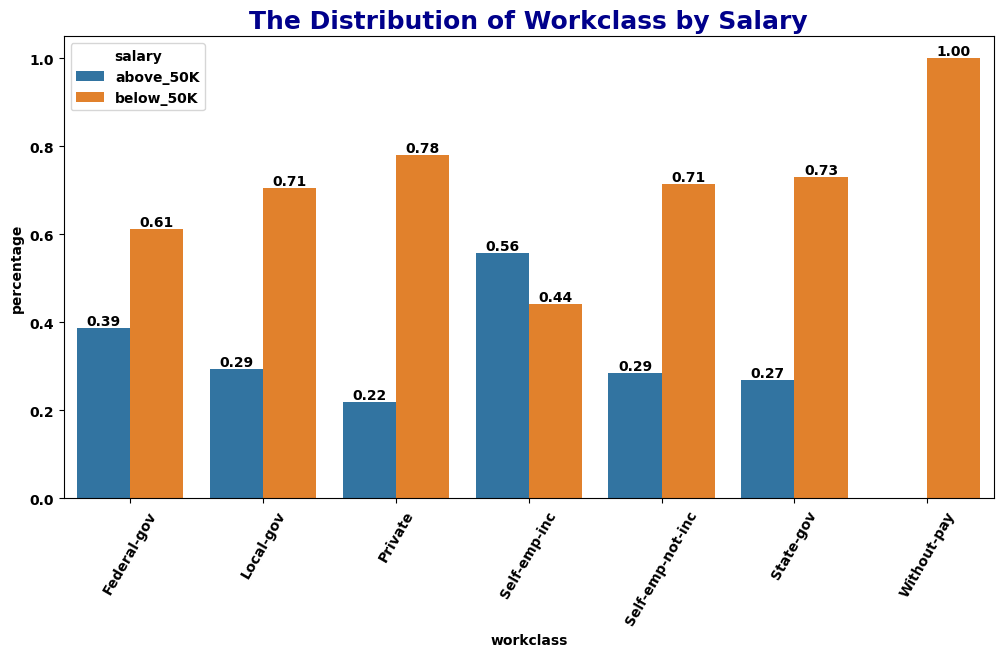

In [393]:
workclass = workclass.sort_values(by=['workclass', 'salary'])

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=workclass, 
                 x='workclass', 
                 y='percentage', 
                 hue='salary', 
                 order=workclass.groupby('workclass').percentage.sum().sort_values(ascending=False).index)

plt.title('The Distribution of Workclass by Salary', fontsize=18, color='darkblue')
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f');

**Education**

In [394]:
print('nunique :', df.education.nunique())
print('---'*9)

df.education.value_counts(dropna=False)

nunique : 16
---------------------------


HS-grad         9834
Some-college    6669
Bachelors       5042
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: education, dtype: int64

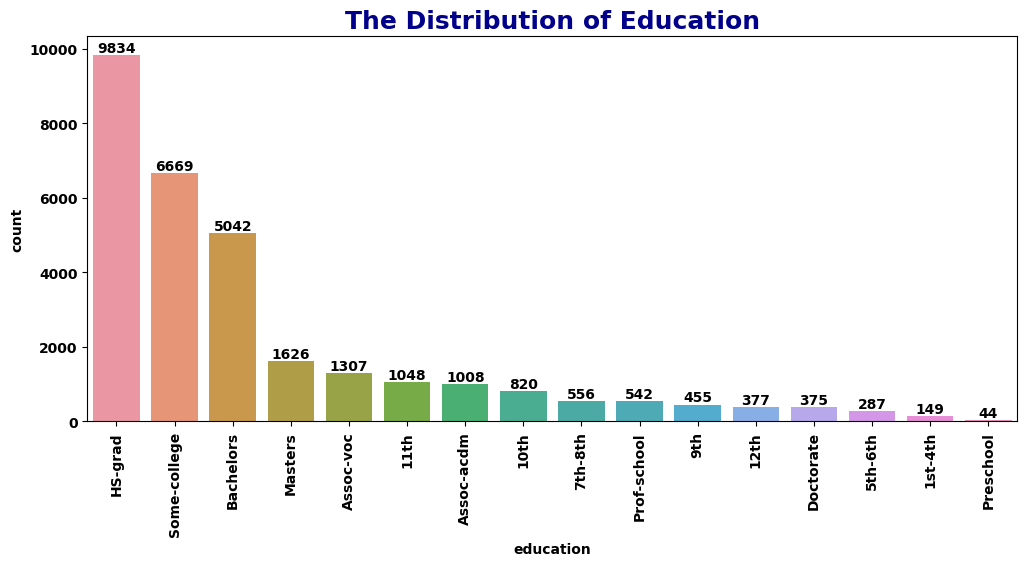

In [395]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, 
                   x='education', 
                   order=df['education'].value_counts().index)

plt.title('The Distribution of Education', fontsize=18, color='darkblue')
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [396]:
df.education.value_counts(normalize=True)

HS-grad         0.326288
Some-college    0.221275
Bachelors       0.167292
Masters         0.053950
Assoc-voc       0.043366
11th            0.034772
Assoc-acdm      0.033445
10th            0.027207
7th-8th         0.018448
Prof-school     0.017983
9th             0.015097
12th            0.012509
Doctorate       0.012442
5th-6th         0.009523
1st-4th         0.004944
Preschool       0.001460
Name: education, dtype: float64

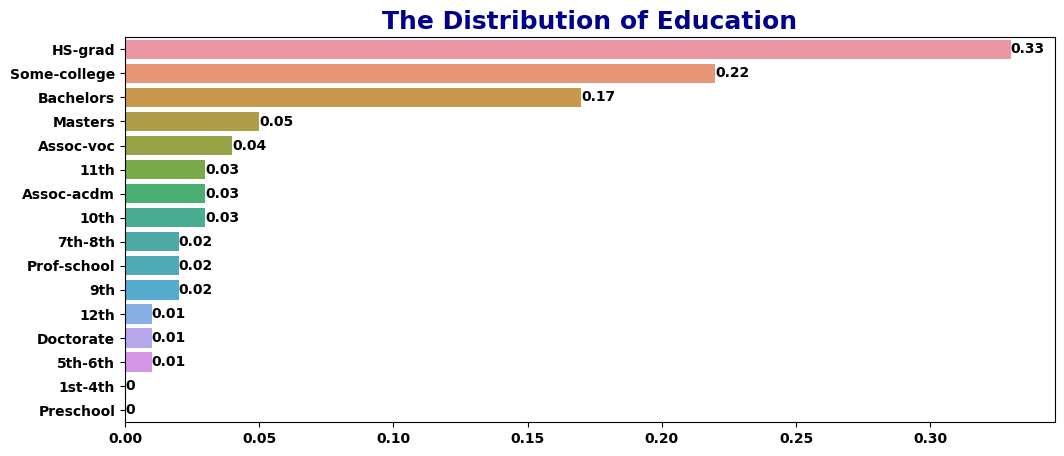

In [397]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df, 
                 x=round(df['education'].value_counts(normalize=True),2).values, 
                 y=df['education'].value_counts(normalize=True).index)

plt.title('The Distribution of Education', fontsize=18, color='darkblue')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

In [398]:
pd.crosstab(df['education'], df['salary']).iplot(kind='bar', title = 'education and salary')

In [399]:
education = df.groupby('education').salary.value_counts(normalize=True).reset_index(name='percentage')
education

education     salary  percentage
0           10th  below_50K    0.928049
1           10th  above_50K    0.071951
2           11th  below_50K    0.943702
3           11th  above_50K    0.056298
4           12th  below_50K    0.923077
5           12th  above_50K    0.076923
6        1st-4th  below_50K    0.959732
7        1st-4th  above_50K    0.040268
8        5th-6th  below_50K    0.958188
9        5th-6th  above_50K    0.041812
10       7th-8th  below_50K    0.937050
11       7th-8th  above_50K    0.062950
12           9th  below_50K    0.945055
13           9th  above_50K    0.054945
14    Assoc-acdm  below_50K    0.746032
15    Assoc-acdm  above_50K    0.253968
16     Assoc-voc  below_50K    0.736802
17     Assoc-voc  above_50K    0.263198
18     Bachelors  below_50K    0.578342
19     Bachelors  above_50K    0.421658
20     Doctorate  above_50K    0.746667
21     Doctorate  below_50K    0.253333
22       HS-grad  below_50K    0.835672
23       HS-grad  above_50K    0.164328
24       Masters  above_50K    0.564576
25       Masters  below_50K    0.435424
26     Preschool  below_50K    1.000000
27   Prof-school  above_50K    0.749077
28   Prof-school  below_50K    0.250923
29  Some-college  below_50K    0.799820
30  Some-college  above_50K    0.200180

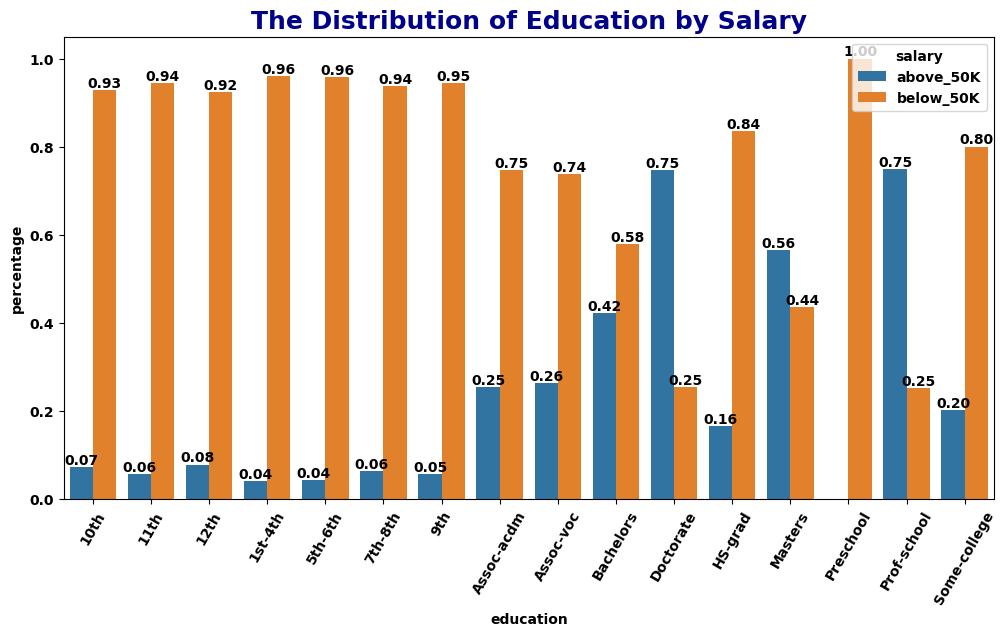

In [400]:
education = education.sort_values(by=['education', 'salary'])

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=education, 
                 x='education', 
                 y='percentage', 
                 hue='salary', 
                 order=education.groupby('education').percentage.sum().sort_values(ascending=False).index)

plt.title('The Distribution of Education by Salary', fontsize=18, color='darkblue')
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f');

In [401]:
def mapping_education(x):
    if x in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'low_level_grade'
    elif x in ['HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm']:
        return 'medium_level_grade'
    elif x in ['Bachelors', 'Masters', 'Prof-school', 'Doctorate']:
        return 'high_level_grade'

In [402]:
df['education'] = df.education.apply(mapping_education)

print('nunique :', df.education.nunique())
print('---'*9)

df.education.value_counts(dropna=False)

nunique : 3
---------------------------


medium_level_grade    18818
high_level_grade       7585
low_level_grade        3736
Name: education, dtype: int64

In [403]:
pd.crosstab(df['education'], df['salary']).iplot(kind='bar', title = 'education and salary')

**marital_status**

In [404]:
print('nunique :', df.marital_status.nunique())
print('---'*9)

df.marital_status.value_counts(dropna=False)

nunique : 7
---------------------------


Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital_status, dtype: int64

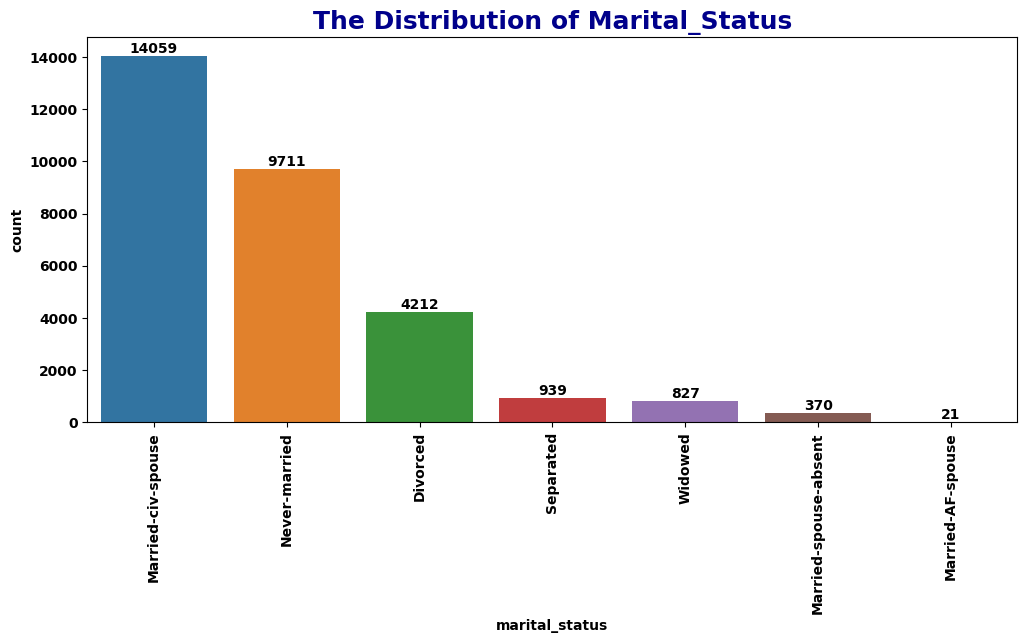

In [405]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, 
                   x='marital_status', 
                   order=df['marital_status'].value_counts().index)

plt.title('The Distribution of Marital_Status', fontsize=18, color='darkblue')
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [406]:
df.marital_status.value_counts(normalize=True)

Married-civ-spouse       0.466472
Never-married            0.322207
Divorced                 0.139752
Separated                0.031156
Widowed                  0.027440
Married-spouse-absent    0.012276
Married-AF-spouse        0.000697
Name: marital_status, dtype: float64

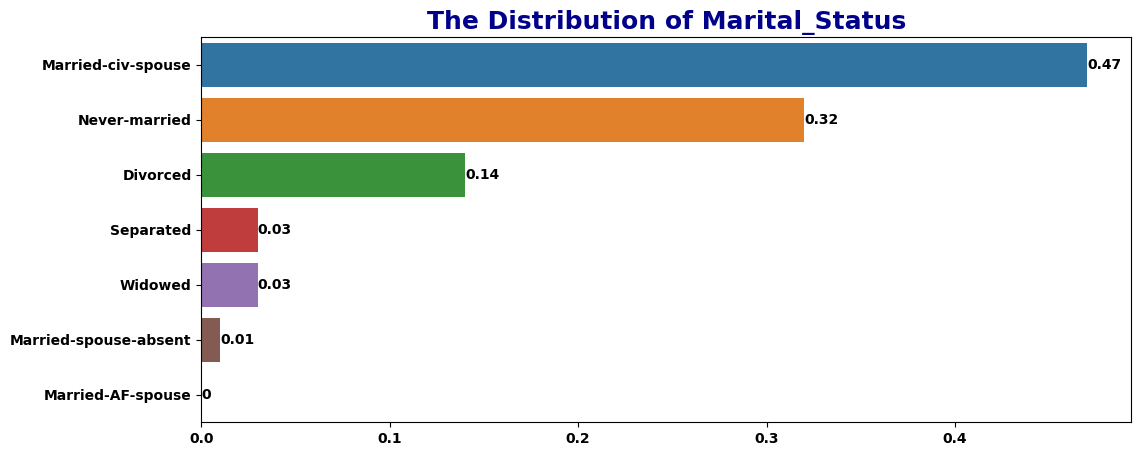

In [407]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df, 
                 x=round(df['marital_status'].value_counts(normalize=True),2).values, 
                 y=df['marital_status'].value_counts(normalize=True).index)

plt.title('The Distribution of Marital_Status', fontsize=18, color='darkblue')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

In [408]:
pd.crosstab(df['marital_status'], df['salary']).iplot(kind='bar', title = 'marital_status and salary')

In [409]:
marital_status = df.groupby('marital_status').salary.value_counts(normalize=True).reset_index(name='percentage')
marital_status

marital_status     salary  percentage
0                Divorced  below_50K    0.892688
1                Divorced  above_50K    0.107312
2       Married-AF-spouse  below_50K    0.523810
3       Married-AF-spouse  above_50K    0.476190
4      Married-civ-spouse  below_50K    0.544989
5      Married-civ-spouse  above_50K    0.455011
6   Married-spouse-absent  below_50K    0.916216
7   Married-spouse-absent  above_50K    0.083784
8           Never-married  below_50K    0.951601
9           Never-married  above_50K    0.048399
10              Separated  below_50K    0.929712
11              Separated  above_50K    0.070288
12                Widowed  below_50K    0.903265
13                Widowed  above_50K    0.096735

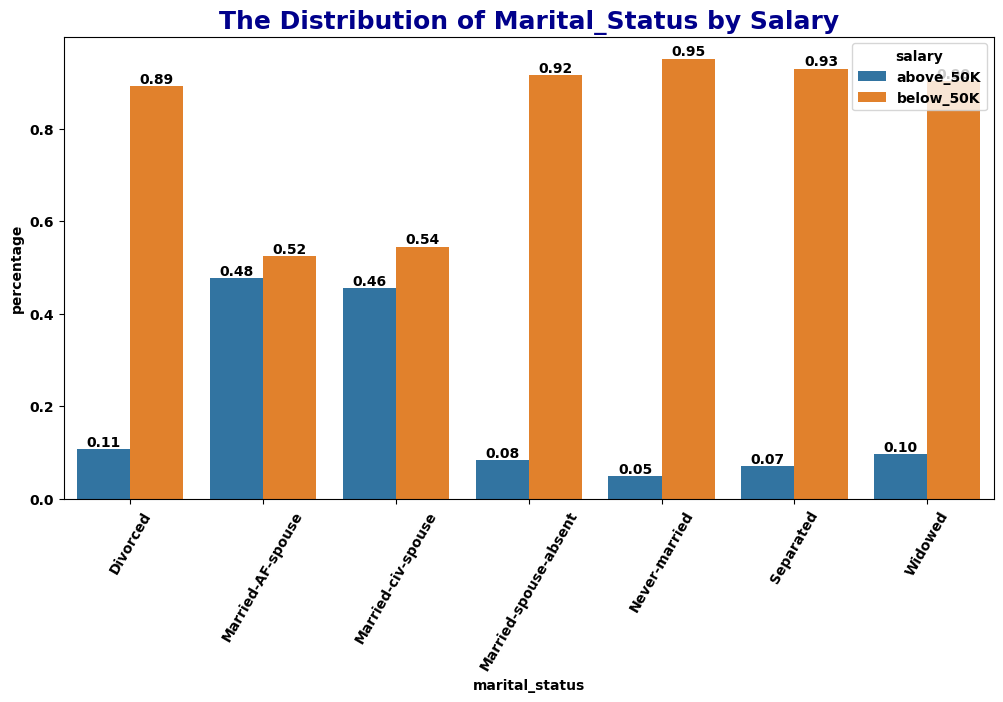

In [410]:
marital_status = marital_status.sort_values(by=['marital_status', 'salary'])

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=marital_status, 
                 x='marital_status', 
                 y='percentage', 
                 hue='salary', 
                 order=marital_status.groupby('marital_status').percentage.sum().sort_values(ascending=False).index)

plt.title('The Distribution of Marital_Status by Salary', fontsize=18, color='darkblue')
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f');

In [411]:
def mapping_marital_status(x):
    if x in ['Never-married', 'Divorced', 'Separated', 'Widowed']:
        return 'unmarried'
    elif x in ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']:
        return 'married'

In [412]:
df['marital_status'] = df.marital_status.apply(mapping_marital_status)

print('nunique :', df.marital_status.nunique())
print('---'*9)

df.marital_status.value_counts(dropna=False)

nunique : 2
---------------------------


unmarried    15689
married      14450
Name: marital_status, dtype: int64

In [413]:
pd.crosstab(df['marital_status'], df['salary']).iplot(kind='bar', title = 'marital_status and salary')

**occupation**

In [414]:
print('nunique :', df.occupation.nunique())
print('---'*9)

df.occupation.value_counts(dropna=False)

nunique : 14
---------------------------


Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
Name: occupation, dtype: int64

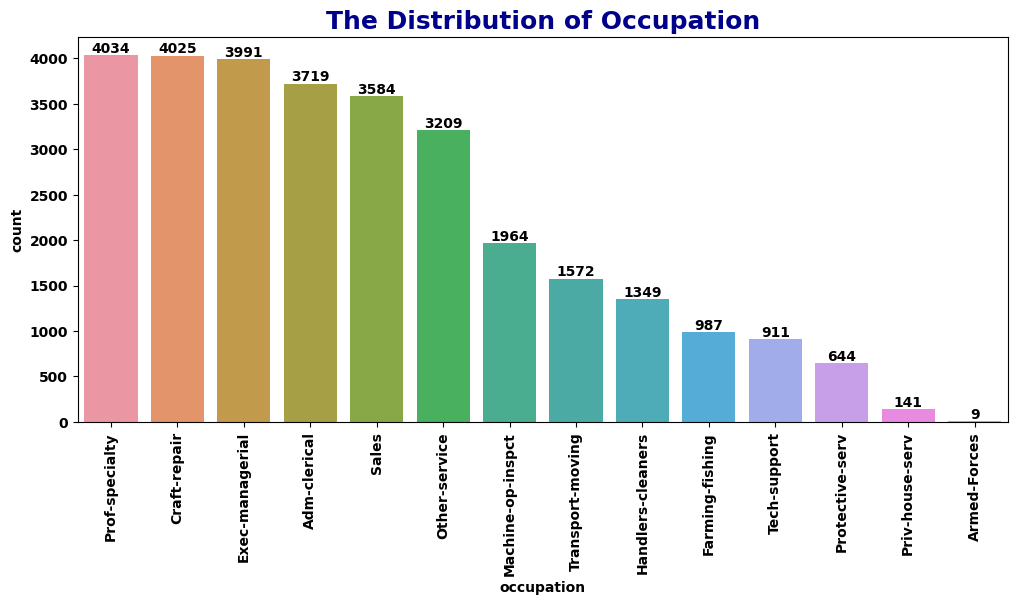

In [415]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, 
                   x='occupation', 
                   order=df['occupation'].value_counts().index)

plt.title('The Distribution of Occupation', fontsize=18, color='darkblue')
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [416]:
df.occupation.value_counts(normalize=True)

Prof-specialty       0.133847
Craft-repair         0.133548
Exec-managerial      0.132420
Adm-clerical         0.123395
Sales                0.118916
Other-service        0.106473
Machine-op-inspct    0.065165
Transport-moving     0.052158
Handlers-cleaners    0.044759
Farming-fishing      0.032748
Tech-support         0.030227
Protective-serv      0.021368
Priv-house-serv      0.004678
Armed-Forces         0.000299
Name: occupation, dtype: float64

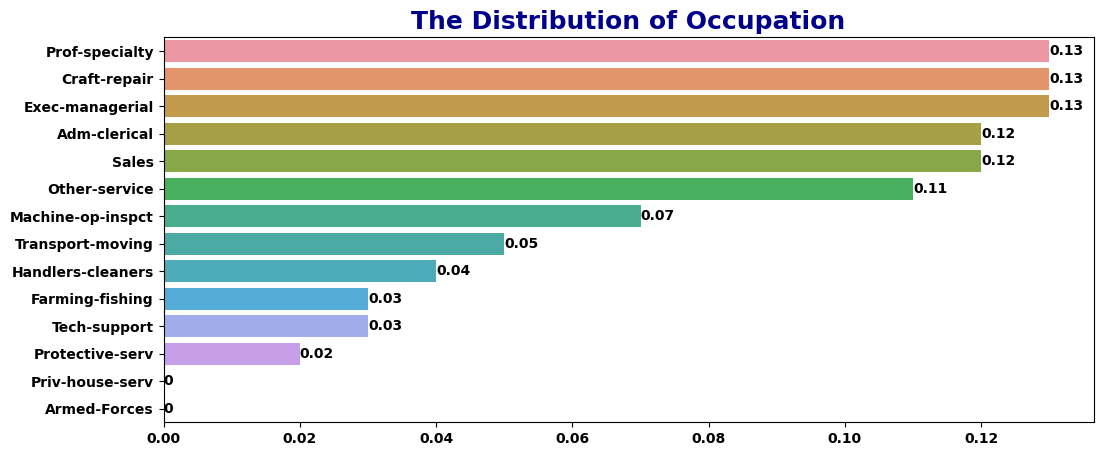

In [417]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df, 
                 x=round(df['occupation'].value_counts(normalize=True),2).values, 
                 y=df['occupation'].value_counts(normalize=True).index)

plt.title('The Distribution of Occupation', fontsize=18, color='darkblue')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

In [418]:
pd.crosstab(df['occupation'], df['salary']).iplot(kind='bar', title = 'occupation and salary')

In [419]:
occupation = df.groupby('occupation').salary.value_counts(normalize=True).reset_index(name='percentage')
occupation

occupation     salary  percentage
0        Adm-clerical  below_50K    0.866093
1        Adm-clerical  above_50K    0.133907
2        Armed-Forces  below_50K    0.888889
3        Armed-Forces  above_50K    0.111111
4        Craft-repair  below_50K    0.774410
5        Craft-repair  above_50K    0.225590
6     Exec-managerial  below_50K    0.514658
7     Exec-managerial  above_50K    0.485342
8     Farming-fishing  below_50K    0.883485
9     Farming-fishing  above_50K    0.116515
10  Handlers-cleaners  below_50K    0.938473
11  Handlers-cleaners  above_50K    0.061527
12  Machine-op-inspct  below_50K    0.875764
13  Machine-op-inspct  above_50K    0.124236
14      Other-service  below_50K    0.958866
15      Other-service  above_50K    0.041134
16    Priv-house-serv  below_50K    0.992908
17    Priv-house-serv  above_50K    0.007092
18     Prof-specialty  below_50K    0.551314
19     Prof-specialty  above_50K    0.448686
20    Protective-serv  below_50K    0.673913
21    Protective-serv  above_50K    0.326087
22              Sales  below_50K    0.729353
23              Sales  above_50K    0.270647
24       Tech-support  below_50K    0.694841
25       Tech-support  above_50K    0.305159
26   Transport-moving  below_50K    0.797074
27   Transport-moving  above_50K    0.202926

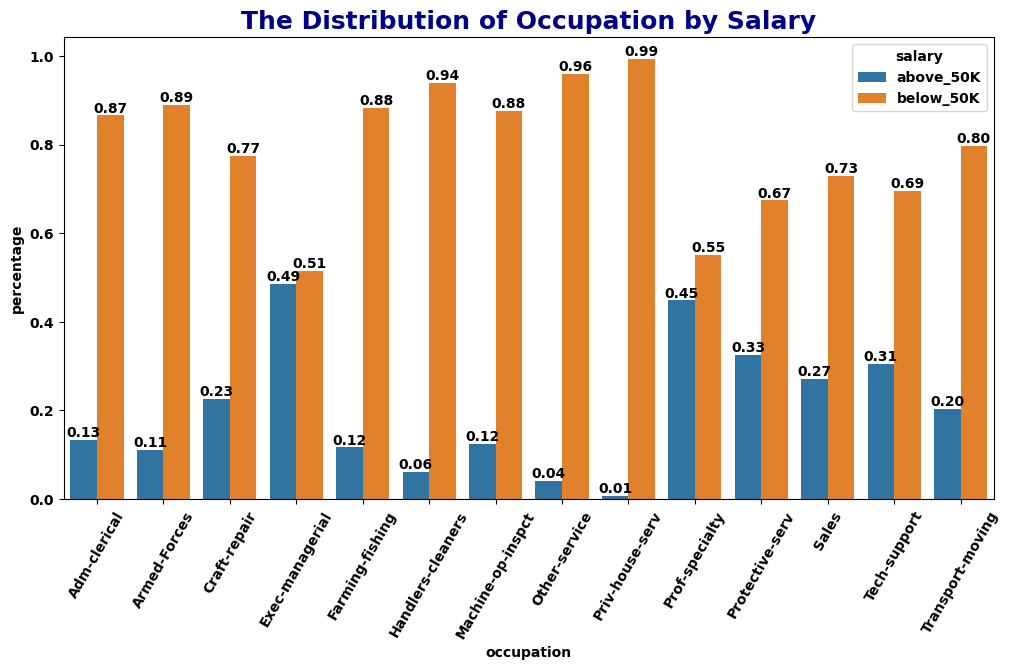

In [420]:
occupation = occupation.sort_values(by=['occupation', 'salary'])

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=occupation, 
                 x='occupation', 
                 y='percentage', 
                 hue='salary', 
                 order=occupation.groupby('occupation').percentage.sum().sort_values(ascending=False).index)

plt.title('The Distribution of Occupation by Salary', fontsize=18, color='darkblue')
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f');

**race**

In [421]:
print('nunique :', df.race.nunique())
print('---'*9)

df.race.value_counts(dropna=False)

nunique : 5
---------------------------


White                 25912
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

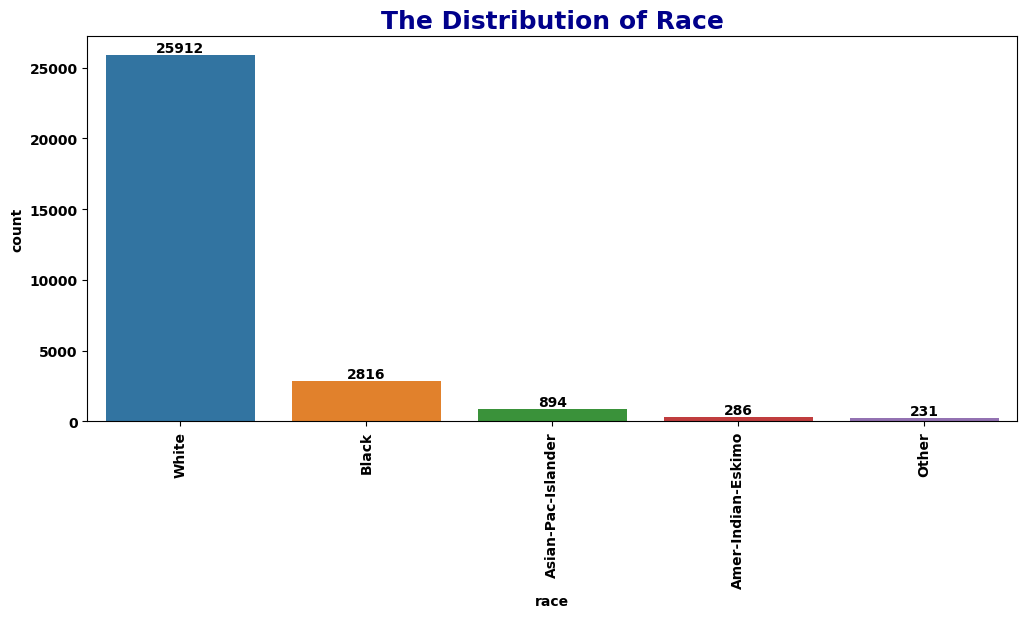

In [422]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, 
                   x='race', 
                   order=df['race'].value_counts().index)

plt.title('The Distribution of Race', fontsize=18, color='darkblue')
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [423]:
df.race.value_counts(normalize=True)

White                 0.859750
Black                 0.093434
Asian-Pac-Islander    0.029663
Amer-Indian-Eskimo    0.009489
Other                 0.007664
Name: race, dtype: float64

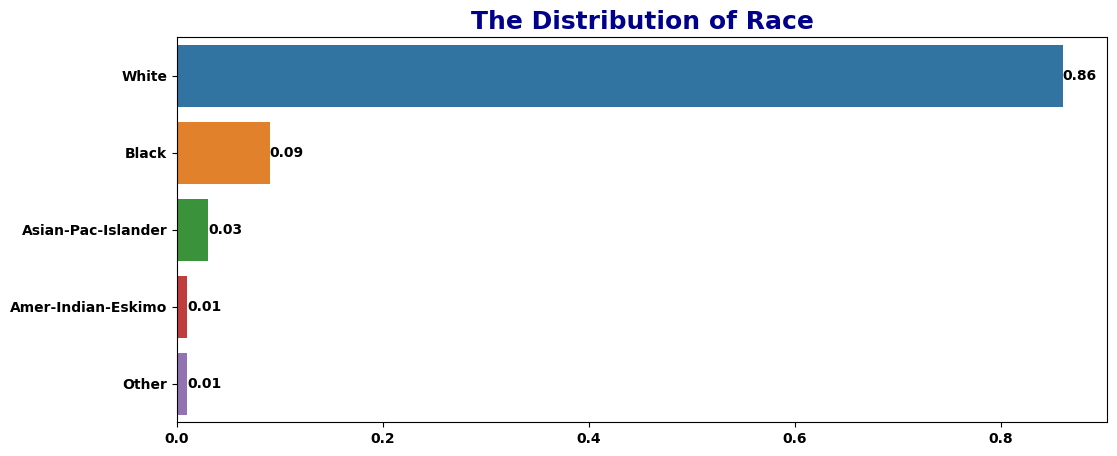

In [424]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df, 
                 x=round(df['race'].value_counts(normalize=True),2).values, 
                 y=df['race'].value_counts(normalize=True).index)

plt.title('The Distribution of Race', fontsize=18, color='darkblue')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

In [425]:
pd.crosstab(df['race'], df['salary']).iplot(kind='bar', title = 'race and salary')

In [426]:
race = df.groupby('race').salary.value_counts(normalize=True).reset_index(name='percentage')
race

race     salary  percentage
0  Amer-Indian-Eskimo  below_50K    0.881119
1  Amer-Indian-Eskimo  above_50K    0.118881
2  Asian-Pac-Islander  below_50K    0.722595
3  Asian-Pac-Islander  above_50K    0.277405
4               Black  below_50K    0.870028
5               Black  above_50K    0.129972
6               Other  below_50K    0.909091
7               Other  above_50K    0.090909
8               White  below_50K    0.736145
9               White  above_50K    0.263855

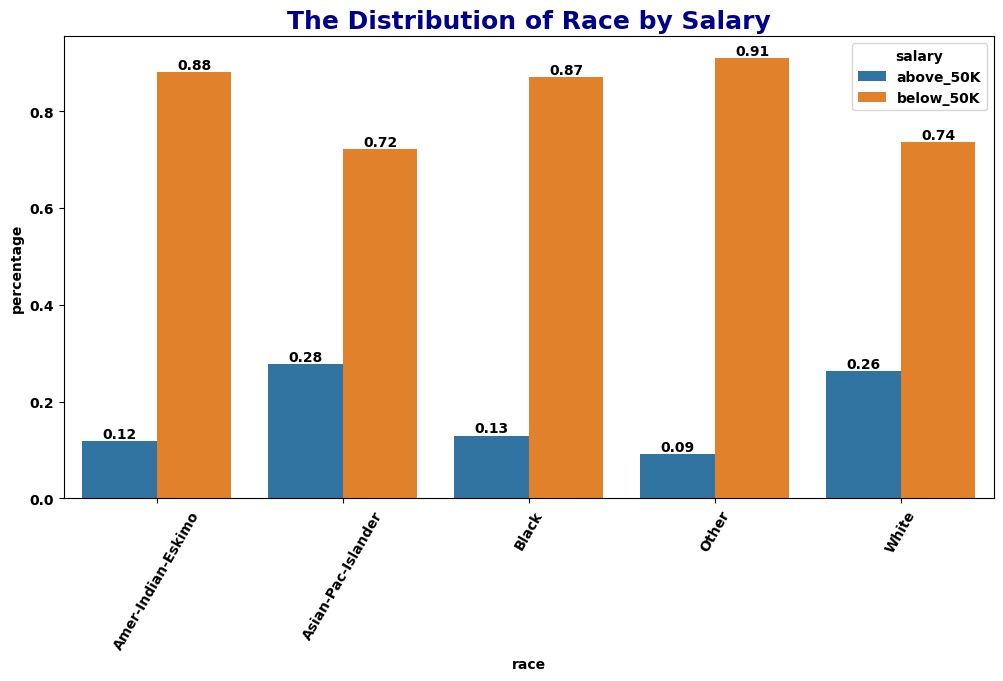

In [427]:
race = race.sort_values(by=['race', 'salary'])

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=race, 
                 x='race', 
                 y='percentage', 
                 hue='salary', 
                 order=race.groupby('race').percentage.sum().sort_values(ascending=False).index)

plt.title('The Distribution of Race by Salary', fontsize=18, color='darkblue')
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f');

**sex**

In [428]:
print('nunique :', df.sex.nunique())
print('---'*9)

df.sex.value_counts(dropna=False)

nunique : 2
---------------------------


Male      20366
Female     9773
Name: sex, dtype: int64

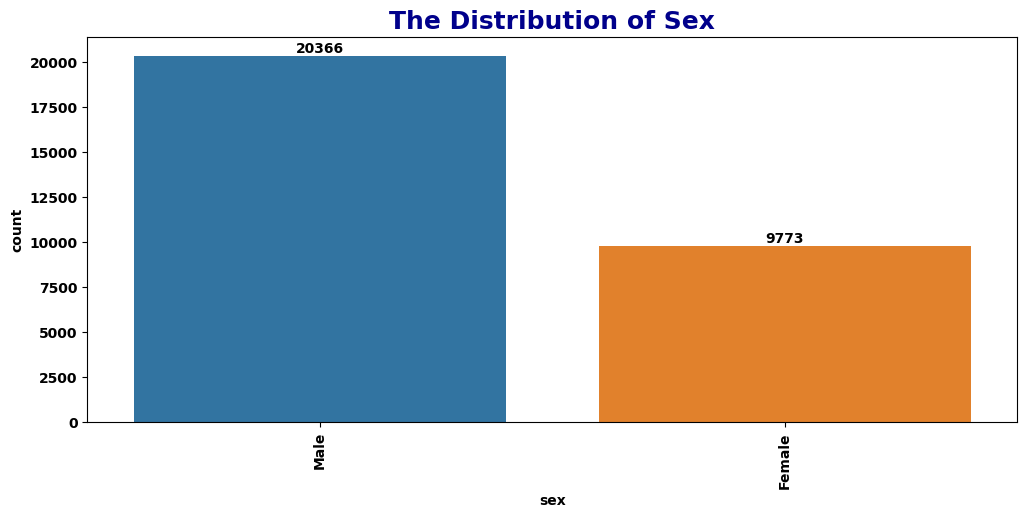

In [429]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, 
                   x='sex', 
                   order=df['sex'].value_counts().index)

plt.title('The Distribution of Sex', fontsize=18, color='darkblue')
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [430]:
df.sex.value_counts(normalize=True)

Male      0.675736
Female    0.324264
Name: sex, dtype: float64

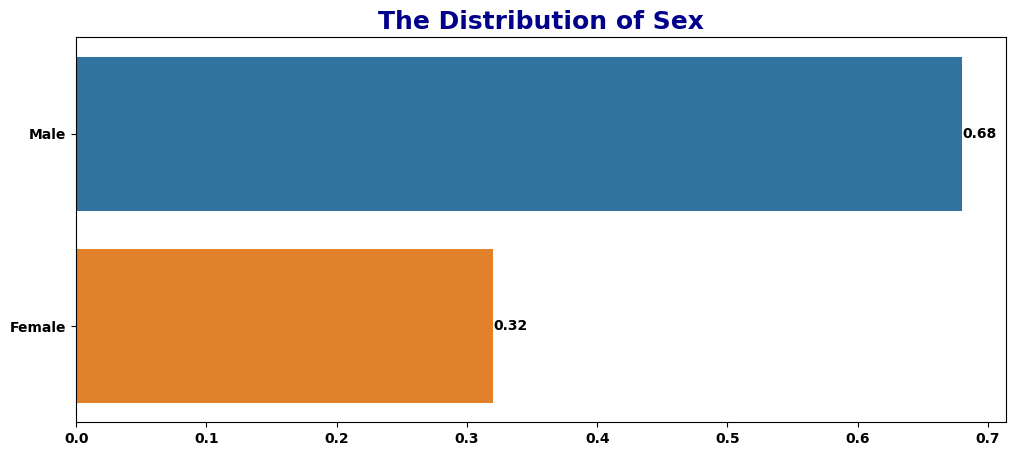

In [431]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df, 
                 x=round(df['sex'].value_counts(normalize=True),2).values, 
                 y=df['sex'].value_counts(normalize=True).index)

plt.title('The Distribution of Sex', fontsize=18, color='darkblue')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

In [432]:
pd.crosstab(df['sex'], df['salary']).iplot(kind='bar', title = 'sex and salary')

In [433]:
sex = df.groupby('sex').salary.value_counts(normalize=True).reset_index(name='percentage')
sex

sex     salary  percentage
0  Female  below_50K    0.886217
1  Female  above_50K    0.113783
2    Male  below_50K    0.686045
3    Male  above_50K    0.313955

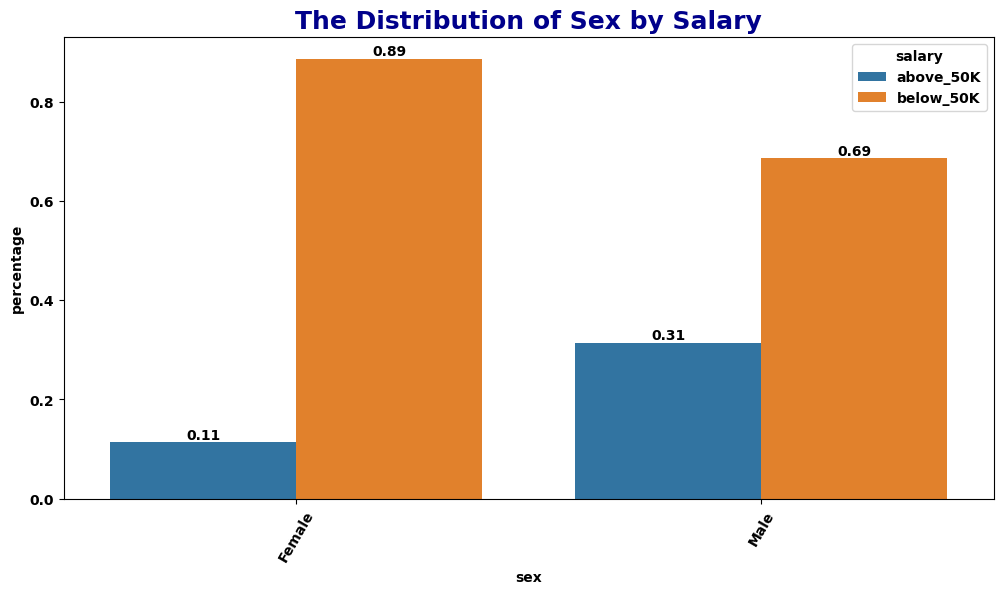

In [434]:
sex = sex.sort_values(by=['sex', 'salary'])

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=sex, 
                 x='sex', 
                 y='percentage', 
                 hue='salary', 
                 order=sex.groupby('sex').percentage.sum().sort_values(ascending=False).index)

plt.title('The Distribution of Sex by Salary', fontsize=18, color='darkblue')
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f');

**native_country**

In [435]:
print('nunique :', df.native_country.nunique())
print('---'*9)

df.native_country.value_counts(dropna=False)

nunique : 41
---------------------------


United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

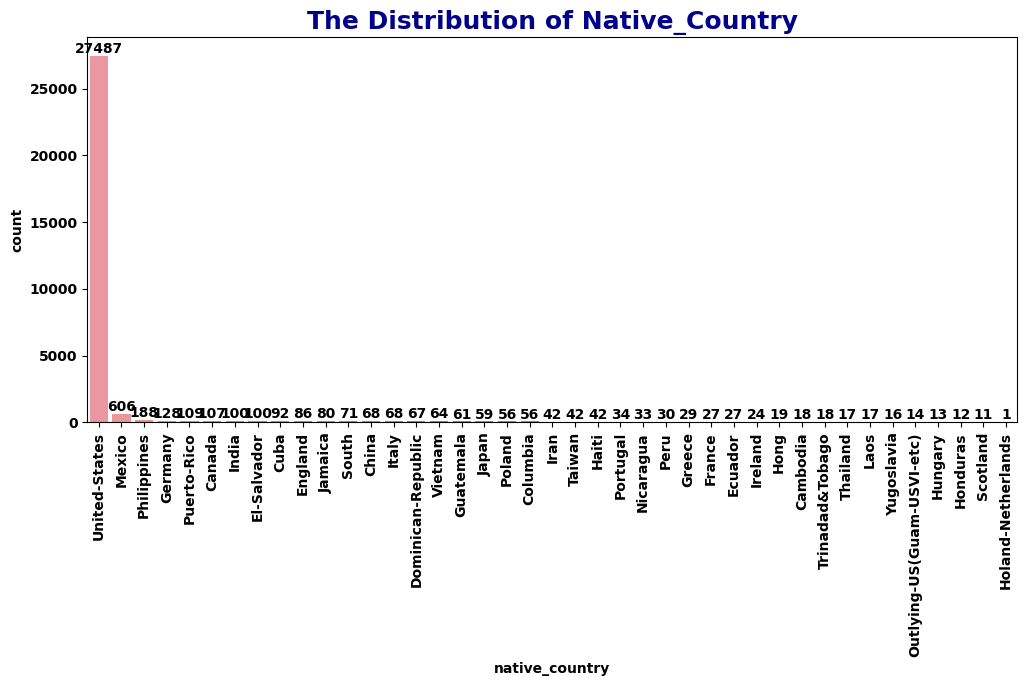

In [436]:
plt.figure(figsize=(12, 5))

ax = sns.countplot(data=df, 
                   x='native_country', 
                   order=df['native_country'].value_counts().index)

plt.title('The Distribution of Native_Country', fontsize=18, color='darkblue')
plt.xticks(rotation=90)

for container in ax.containers:
    ax.bar_label(container);

In [437]:
df.native_country.value_counts(normalize=True)

United-States                 0.912008
Mexico                        0.020107
Philippines                   0.006238
Germany                       0.004247
Puerto-Rico                   0.003617
Canada                        0.003550
India                         0.003318
El-Salvador                   0.003318
Cuba                          0.003053
England                       0.002853
Jamaica                       0.002654
South                         0.002356
China                         0.002256
Italy                         0.002256
Dominican-Republic            0.002223
Vietnam                       0.002123
Guatemala                     0.002024
Japan                         0.001958
Poland                        0.001858
Columbia                      0.001858
Iran                          0.001394
Taiwan                        0.001394
Haiti                         0.001394
Portugal                      0.001128
Nicaragua                     0.001095
Peru                     

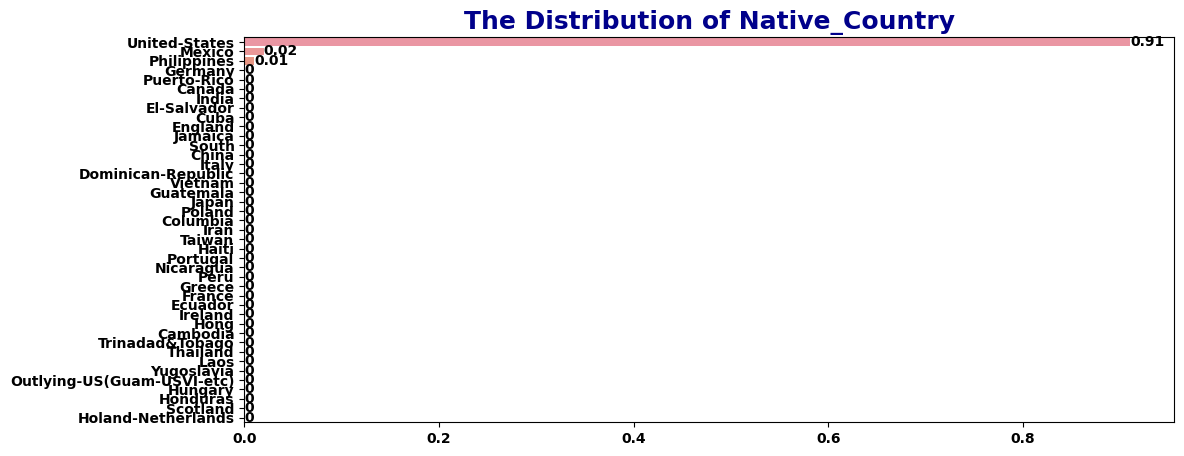

In [438]:
plt.figure(figsize=(12, 5))

ax = sns.barplot(data=df, 
                 x=round(df['native_country'].value_counts(normalize=True),2).values, 
                 y=df['native_country'].value_counts(normalize=True).index)

plt.title('The Distribution of Native_Country', fontsize=18, color='darkblue')
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

In [439]:
pd.crosstab(df['native_country'], df['salary']).iplot(kind='bar', title = 'native_country and salary')

In [440]:
native_country = df.groupby('native_country').salary.value_counts(normalize=True).reset_index(name='percentage')
native_country

native_country     salary  percentage
0        Cambodia  below_50K    0.611111
1        Cambodia  above_50K    0.388889
2          Canada  below_50K    0.663551
3          Canada  above_50K    0.336449
4           China  below_50K    0.705882
..            ...        ...         ...
75  United-States  above_50K    0.254411
76        Vietnam  below_50K    0.921875
77        Vietnam  above_50K    0.078125
78     Yugoslavia  below_50K    0.625000
79     Yugoslavia  above_50K    0.375000

[80 rows x 3 columns]

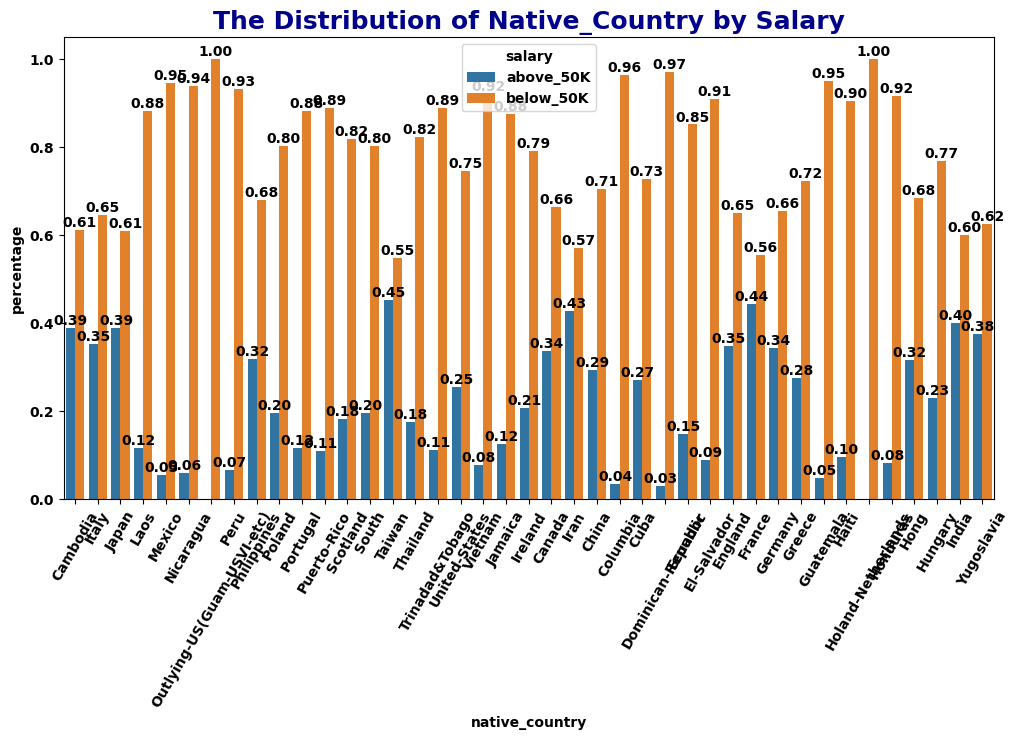

In [441]:
native_country = native_country.sort_values(by=['native_country', 'salary'])

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=native_country, 
                 x='native_country', 
                 y='percentage', 
                 hue='salary', 
                 order=native_country.groupby('native_country').percentage.sum().sort_values(ascending=False).index)

plt.title('The Distribution of Native_Country by Salary', fontsize=18, color='darkblue')
plt.xticks(rotation=60)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f');

In [442]:
NAmerica = ['Mexico', 'Canada']
MAmerica = ['El-Salvador', 'Guatemala', 'Nicaragua', 'Honduras']
SAmerica = ['Columbia', 'Peru', 'Ecuador', 'Trinadad&Tobago']
Asia = ['India', 'Iran']
EAsia = ['South', 'Japan']
SEAsia = ['Philippines', 'Vietnam', 'Taiwan', 'Cambodia', 'Thailand', 'Laos', 'Outlying-US(Guam-USVI-etc)']
Europe = ['Germany', 'Italy', 'Poland', 'Portugal', 'Greece', 'France', 'Yugoslavia', 'Hungary', 'Holand-Netherlands']
Caribbean = ['Puerto-Rico', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Haiti']
GreatBritain = ['Ireland', 'England', 'Scotland']
China_HongKong = ['China', 'Hong']

In [443]:
def mapping_native_country(x):
    if x == 'United-States':
        return 'US'
    elif x in ['Mexico', 'Canada']:
        return 'North America'
    elif x in ['El-Salvador', 'Guatemala', 'Nicaragua', 'Honduras']:
        return 'Mid America'
    elif x in ['Columbia', 'Peru', 'Ecuador', 'Trinadad&Tobago']:
        return 'South America'
    elif x in ['India', 'Iran']:
        return 'Asia'
    elif x in ['South', 'Japan']:
        return 'Korea&Japan'
    elif x in ['Philippines', 'Vietnam', 'Taiwan', 'Cambodia', 'Thailand', 'Laos', 'Outlying-US(Guam-USVI-etc)']:
        return 'South East Asia'
    elif x in ['Germany', 'Italy', 'Poland', 'Portugal', 'Greece', 'France', 'Yugoslavia', 'Hungary', 'Holand-Netherlands']:
        return 'Europe'
    elif x in ['Puerto-Rico', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Haiti']:
        return 'Caribbean'
    elif x in ['Ireland', 'England', 'Scotland']:
        return 'Great Britain'
    elif x in ['China', 'Hong']:
        return 'China'

In [444]:
df['native_country'] = df.native_country.apply(mapping_native_country)

print('nunique :', df.native_country.nunique())
print('---'*9)

df.native_country.value_counts(dropna=False)

nunique : 11
---------------------------


US                 27487
North America        713
Caribbean            390
Europe               372
South East Asia      360
Mid America          206
Asia                 142
South America        131
Korea&Japan          130
Great Britain        121
China                 87
Name: native_country, dtype: int64

In [445]:
pd.crosstab(df['native_country'], df['salary']).iplot(kind='bar', title = 'native_country and salary')

### Dealing with Outliers

In [446]:
numerical

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

**age**

In [447]:
df.age.describe()

count    30139.000000
mean        38.441720
std         13.131426
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

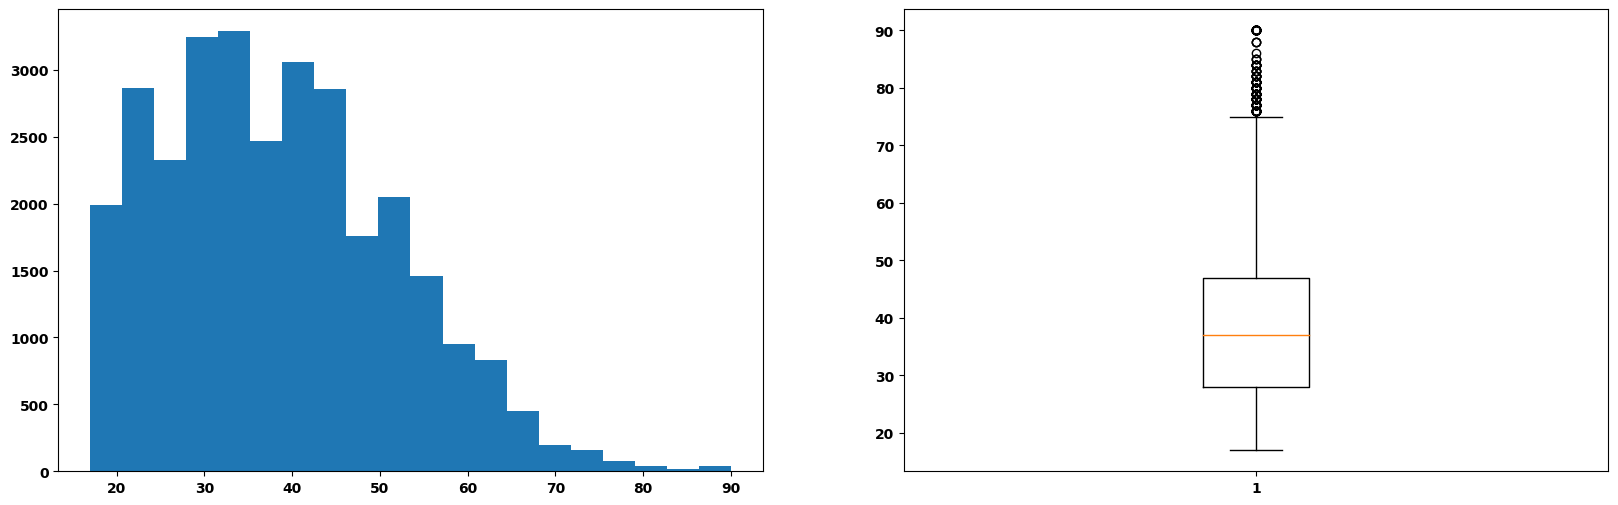

In [448]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.age, bins=20)

plt.subplot(122)
plt.boxplot(df.age, whis=1.5)

plt.show()

In [449]:
df.age.value_counts(dropna=False).sort_index()[:20]

17    328
18    447
19    590
20    628
21    619
22    674
23    823
24    752
25    796
26    745
27    788
28    807
29    774
30    813
31    851
32    789
33    837
34    836
35    827
36    852
Name: age, dtype: int64

In [450]:
df.age.value_counts(dropna=False).sort_index()[-20:]

69    80
70    64
71    54
72    40
73    49
74    38
75    34
76    29
77    20
78    14
79    15
80    16
81    13
82     7
83     5
84     8
85     3
86     1
88     3
90    34
Name: age, dtype: int64

In [451]:
print('Number of rows before dropping outliers:', len(df))

q1, q3 = np.percentile(df['age'],[25,75])

iqr = stats.iqr(df['age'])

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

print('q1:', q1)
print('q3:', q3)
print('fence_low:', fence_low)
print('fence_high:', fence_high)

print('Potential Outliers:', len(df[(df['age'] < fence_low) | (df['age'] > fence_high)]))

Number of rows before dropping outliers: 30139
q1: 28.0
q3: 47.0
fence_low: -0.5
fence_high: 75.5
Potential Outliers: 168


In [452]:
df.loc[(df['age'] < fence_low) | (df['age'] > fence_high)]['age'].value_counts(dropna=False).sort_index()

76    29
77    20
78    14
79    15
80    16
81    13
82     7
83     5
84     8
85     3
86     1
88     3
90    34
Name: age, dtype: int64

[Retirement Age in US](https://en.wikipedia.org/wiki/Retirement_age#:~:text=Pensions%20in%20the%20United%20States,born%20in%201960%20or%20later.)

In [453]:
df.loc[(df['age'] < 18) | (df['age'] > 70)][['age', 'hours_per_week', 'salary']].sort_values(by='age')

age  hours_per_week     salary
23828   17              40  below_50K
11403   17              20  below_50K
21888   17              20  below_50K
21943   17              20  below_50K
21952   17              30  below_50K
...    ...             ...        ...
19747   90              40  below_50K
19489   90              40  below_50K
19212   90              37  below_50K
18832   90              40  below_50K
11512   90              24  below_50K

[711 rows x 3 columns]

In [454]:
len(df[df.age<18]), len(df[df.age>70])

(328, 383)

In [455]:
drop_index = df[(df.age < 18) | (df.age > 75)].sort_values(by='age', ascending=False).index
drop_index

Int64Index([ 1040, 15356, 19489,  5370,  5272, 22220, 14159,  1935, 20610,
             2303,
            ...
            17074, 16994,  4667, 16896, 16828, 16787, 16735, 16387, 16317,
            16840],
           dtype='int64', length=496)

In [456]:
df.drop(drop_index, inplace=True)
df.shape

(29643, 13)

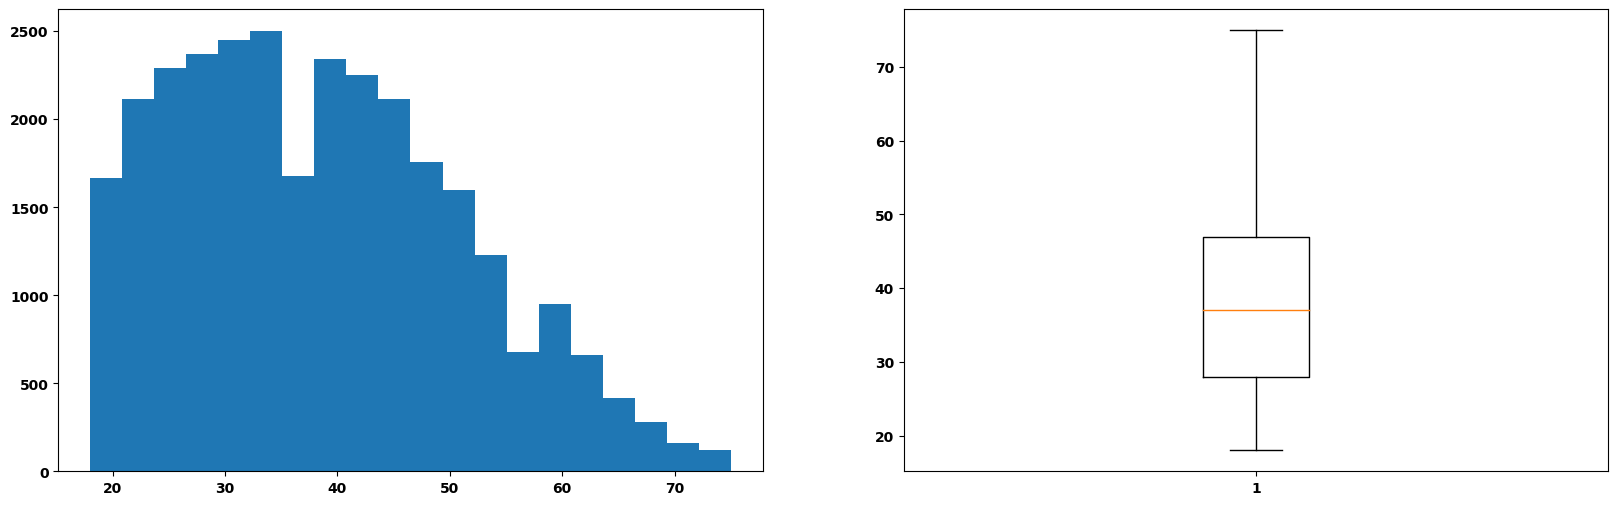

In [457]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.age, bins=20)

plt.subplot(122)
plt.boxplot(df.age, whis=1.5)

plt.show()

**hours_per_week**

In [458]:
df.age.describe()

count    29643.000000
mean        38.435347
std         12.633868
min         18.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         75.000000
Name: age, dtype: float64

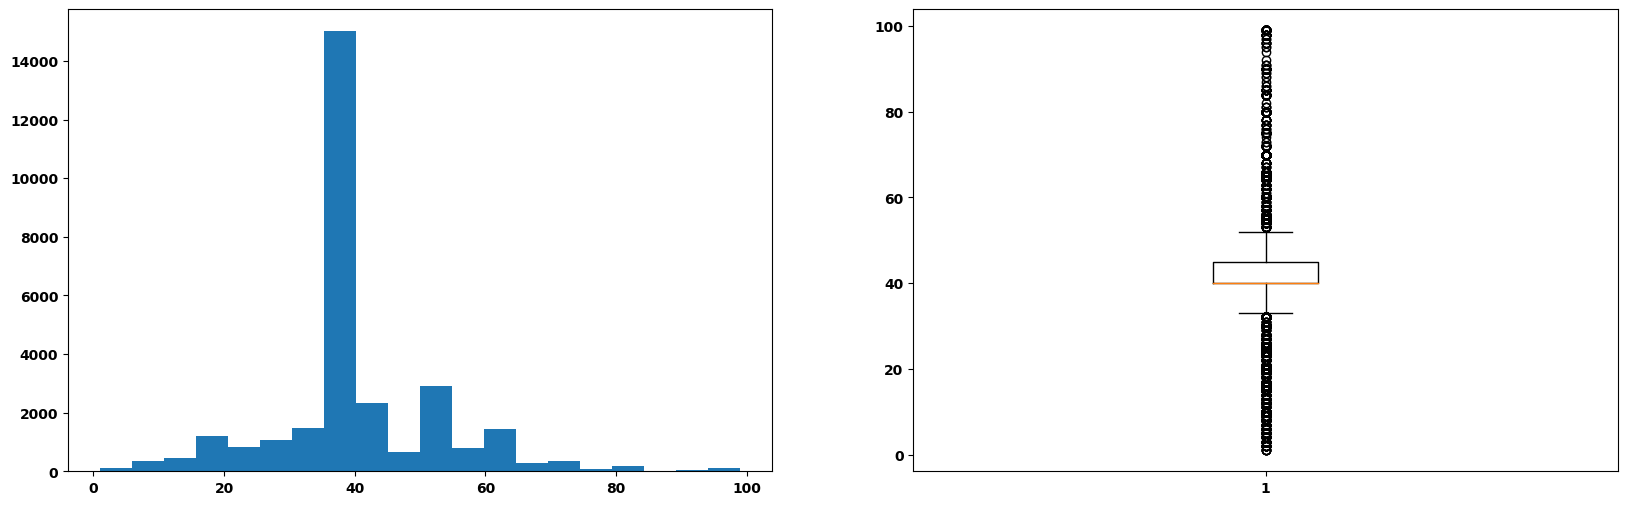

In [459]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hours_per_week, bins=20)

plt.subplot(122)
plt.boxplot(df.hours_per_week, whis=1.5)

plt.show()

In [460]:
df.hours_per_week.value_counts(dropna=False).sort_index()[:20]

1       6
2      14
3      21
4      26
5      32
6      32
7      16
8      90
9      14
10    190
11      9
12    104
13     14
14     24
15    298
16    156
17     22
18     54
19     14
20    951
Name: hours_per_week, dtype: int64

In [461]:
df.hours_per_week.value_counts(dropna=False).sort_index()[-20:]

77      6
78      8
80    120
81      3
82      1
84     40
85     13
86      2
87      1
88      2
89      2
90     28
91      3
92      1
94      1
95      2
96      5
97      2
98     11
99     77
Name: hours_per_week, dtype: int64

[Working hours in US](https://clockify.me/working-hours#:~:text=Working%20hours%20in%20US,more%20than%20other%20OECD%20countries.)

In [462]:
len(df[df.hours_per_week<7]), len(df[df.age>84])

(131, 0)

In [463]:
drop_index = df[(df.hours_per_week < 7) | (df.hours_per_week > 84)].sort_values(by='age', ascending=False).index
drop_index

Int64Index([ 4236, 25078, 30233, 11509, 16604, 18688, 14836,  9164,  6180,
              157,
            ...
            26662, 22958,  6267,  1560,  5843, 29508, 22203, 21350, 30002,
             4568],
           dtype='int64', length=281)

In [464]:
df.drop(drop_index, inplace=True)
df.shape

(29362, 13)

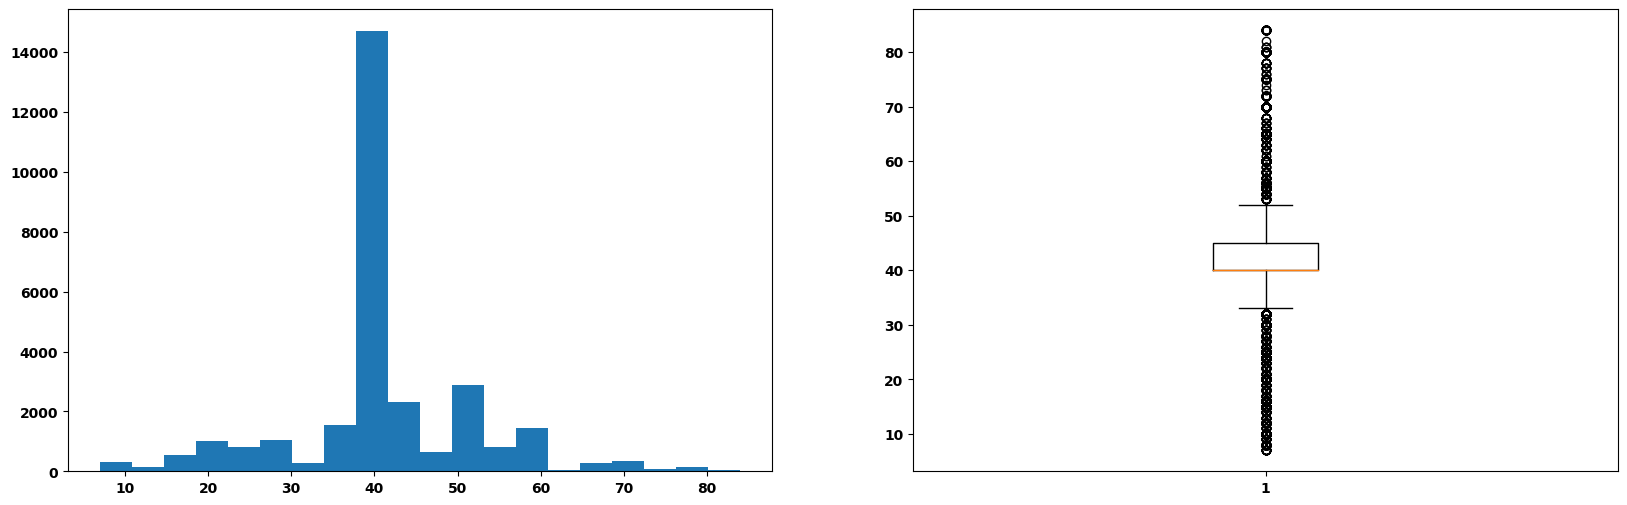

In [465]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.hours_per_week, bins=20)

plt.subplot(122)
plt.boxplot(df.hours_per_week, whis=1.5)

plt.show()

In [466]:
df.reset_index(drop=True, inplace=True)
df.head()

age         workclass  fnlwgt           education marital_status  \
0   39         State-gov   77516    high_level_grade      unmarried   
1   50  Self-emp-not-inc   83311    high_level_grade        married   
2   38           Private  215646  medium_level_grade      unmarried   
3   53           Private  234721     low_level_grade        married   
4   28           Private  338409    high_level_grade        married   

          occupation   race     sex  capital_gain  capital_loss  \
0       Adm-clerical  White    Male          2174             0   
1    Exec-managerial  White    Male             0             0   
2  Handlers-cleaners  White    Male             0             0   
3  Handlers-cleaners  Black    Male             0             0   
4     Prof-specialty  Black  Female             0             0   

   hours_per_week native_country     salary  
0              40             US  below_50K  
1              13             US  below_50K  
2              40             US  below_50K  
3              40             US  below_50K  
4              40      Caribbean  below_50K

In [467]:
df.shape

(29362, 13)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29362 entries, 0 to 29361
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29362 non-null  int64 
 1   workclass       29362 non-null  object
 2   fnlwgt          29362 non-null  int64 
 3   education       29362 non-null  object
 4   marital_status  29362 non-null  object
 5   occupation      29362 non-null  object
 6   race            29362 non-null  object
 7   sex             29362 non-null  object
 8   capital_gain    29362 non-null  int64 
 9   capital_loss    29362 non-null  int64 
 10  hours_per_week  29362 non-null  int64 
 11  native_country  29362 non-null  object
 12  salary          29362 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.9+ MB


In [469]:
df['salary'].value_counts()

below_50K    21945
above_50K     7417
Name: salary, dtype: int64

In [470]:
df['salary'] = df.salary.replace({'below_50K':0, 'above_50K':1})

In [471]:
df['salary'].value_counts()

0    21945
1     7417
Name: salary, dtype: int64

# Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`salary`) is not in your dataframe.

In [472]:
from sklearn.model_selection import train_test_split

In [473]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
len(df_full_train), len(df_test)

(23489, 5873)

In [474]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(17616, 5873, 5873)

In [475]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [476]:
y_train = df_train.salary.values
y_val = df_val.salary.values
y_test = df_test.salary.values

In [477]:
del df_train['salary']
del df_val['salary']
del df_test['salary']

## Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

In [478]:
from sklearn.metrics import mutual_info_score

In [479]:
def mutual_info_salary_score(series):
    return mutual_info_score(series, df_full_train.salary)

In [480]:
mi = df_full_train[categorical].apply(mutual_info_salary_score)
mi.sort_values(ascending=False)

marital_status    0.101223
occupation        0.066651
education         0.055161
sex               0.025150
workclass         0.011943
race              0.006439
native_country    0.004248
dtype: float64

## Feature importance: Correlation

                corr_w_target
age                  0.248819
hours_per_week       0.235170
capital_gain         0.221934
capital_loss         0.149306
fnlwgt               0.010124


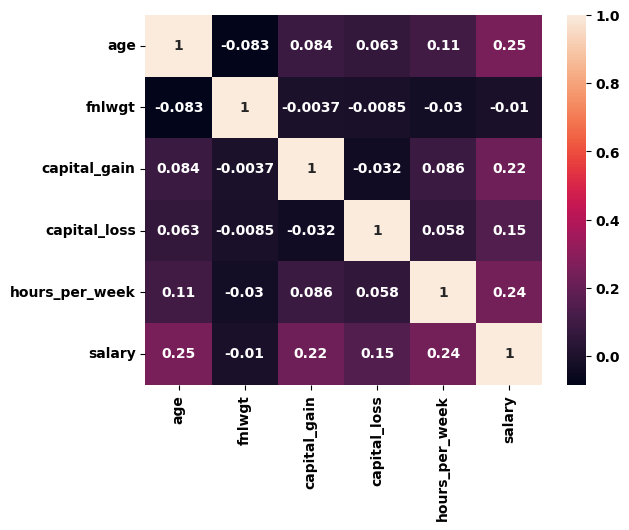

In [481]:
# corr_w_target = df_full_train[numerical].corrwith(df_full_train.salary.replace({'below_50K':0, 'above_50K':1})).abs().sort_values(ascending=False).to_frame('corr_w_target')
corr_w_target = df_full_train[numerical].corrwith(df_full_train.salary).abs().sort_values(ascending=False).to_frame('corr_w_target')
print(corr_w_target)

# df_full_train2 = df_full_train.copy()
# df_full_train2.salary.replace({'below_50K':0, 'above_50K':1}, inplace=True)

sns.heatmap(df_full_train.corr(numeric_only=True), annot=True)
plt.show()

## Feature importance: ROC AUC

In [482]:
from sklearn.metrics import roc_auc_score

In [483]:
result = [(col, roc_auc_score(y_train, df_train[col]) if roc_auc_score(y_train, df_train[col]) >= 0.5 else roc_auc_score(y_train, -df_train[col])) for col in numerical]
result_df = pd.DataFrame(result, columns=['Column', 'AUC'])
print((result_df.sort_values('AUC', ascending=False)))

           Column       AUC
0             age  0.684278
4  hours_per_week  0.660091
2    capital_gain  0.591208
3    capital_loss  0.535163
1          fnlwgt  0.504940


## Apply one-hot-encoding using DictVectorizer

In [484]:
from sklearn.feature_extraction import DictVectorizer

In [485]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [486]:
X_train = dv.transform(train_dict)

In [487]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Logistic Regression

### Logistic Regression Training the model

In [488]:
df_full_train.salary.value_counts(dropna=False)

0    17529
1     5960
Name: salary, dtype: int64

In [489]:
from sklearn.linear_model import LogisticRegression

In [490]:
lr = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [491]:
y_pred_prob = lr.predict_proba(X_val)[:, 1]
y_pred = lr.predict(X_val)

In [492]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

score_accuracy = accuracy_score(y_val, y_pred)
score_precision = precision_score(y_val, y_pred, pos_label=1)
score_recall = recall_score(y_val, y_pred, pos_label=1)
score_f1 = f1_score(y_val, y_pred, pos_label=1)
score_roc_auc = roc_auc_score(y_val, y_pred_prob)

print('accuracy_score -->', score_accuracy)
print('precision_score -->', score_precision)
print('recall_score -->', score_recall)
print('f1_score -->', score_f1)
print('roc_auc_score -->', score_roc_auc)

accuracy_score --> 0.8035075770475055
precision_score --> 0.5708884688090737
recall_score --> 0.8308115543328748
f1_score --> 0.6767507002801121
roc_auc_score --> 0.8980396175947741


[[3511  908]
 [ 246 1208]]


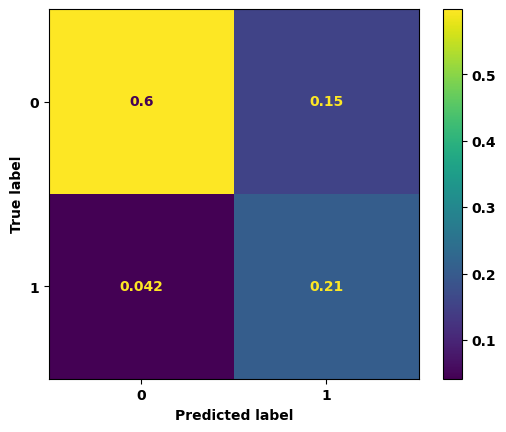

In [493]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(confusion_matrix(y_val, y_pred))
ConfusionMatrixDisplay.from_estimator(lr, X_val, y_val, normalize='all')

In [494]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('Val_Set')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print('Train_Set')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [495]:
eval_metric(lr, X_train, y_train, X_val, y_val)

Val_Set
[[3511  908]
 [ 246 1208]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4419
           1       0.57      0.83      0.68      1454

    accuracy                           0.80      5873
   macro avg       0.75      0.81      0.77      5873
weighted avg       0.84      0.80      0.81      5873


Train_Set
[[10509  2601]
 [  790  3716]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     13110
           1       0.59      0.82      0.69      4506

    accuracy                           0.81     17616
   macro avg       0.76      0.81      0.77     17616
weighted avg       0.84      0.81      0.82     17616



### Logistic Regression Cross Validaiton

In [496]:
from sklearn.model_selection import KFold

In [497]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train_ = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=C, class_weight='balanced', random_state=42)
    model.fit(X_train_, y_train_)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [498]:
columns = numerical + categorical

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train_ = df_train['salary']
    y_val_ = df_val['salary']
    
    del df_train['salary']
    del df_val['salary']

    dv, lr_cv = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, lr_cv)

    auc = roc_auc_score(y_val_, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.898 +- 0.003


In [499]:
y_pred = lr_cv.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train_auc:', auc)

y_pred = lr_cv.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val_auc:', auc)

train_auc: 0.8994911183766165
val_auc: 0.899561120495995


In [500]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, class_weight='balanced', random_state=42)
cv_results = cross_val_score(lr_cv, X_train, y_train, cv = kfold, scoring = 'roc_auc')
round(np.std(cv_results),3)

0.003

### Logistic Regression Hyperparemeter Tuning

In [501]:
from tqdm.auto import tqdm

In [502]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train_ = df_train['salary'].values
        y_val_ = df_val['salary'].values

        dv, lr_gs = train(df_train, y_train_, C=C)
        y_pred = predict(df_val, dv, lr_gs)

        auc = roc_auc_score(y_val_, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/6 [00:00<?, ?it/s]

C=0.01 0.894 +- 0.003
C=0.1 0.898 +- 0.003
C=0.5 0.899 +- 0.002
C=1 0.898 +- 0.003
C=5 0.897 +- 0.004
C=10 0.899 +- 0.002


In [503]:
scores

[0.8980396254333377,
 0.8975261347215421,
 0.9023240727696401,
 0.8948432300455321,
 0.8998598958801127]

In [504]:
from sklearn.model_selection import GridSearchCV

# model = LogisticRegression(solver='liblinear', max_iter=1000, C=C, class_weight='balanced', random_state=42)
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', random_state=42)
C = [0.01, 0.1, 0.5, 1, 5, 10] 

param_grid = {'C' : C}

cv = StratifiedKFold(n_splits = 5)

lr_gs = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = 'roc_auc',
                          n_jobs = -1,
                          return_train_score=True)

lr_gs.fit(X_train, y_train)

print(lr_gs.best_estimator_)
print('-'*25)
print(pd.DataFrame(lr_gs.cv_results_).loc[lr_gs.best_index_, ['mean_test_score', 'mean_train_score']])

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')
-------------------------
mean_test_score     0.898105
mean_train_score    0.899794
Name: 2, dtype: object


### Logistic Regression Final Model

In [505]:
log_final = LogisticRegression(solver='liblinear', max_iter=1000, C=0.5, class_weight='balanced', random_state=42)
log_final.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [506]:
y_pred_prob = log_final.predict_proba(X_val)[:, 1]
y_pred = log_final.predict(X_val)

In [507]:
log_accuracy = accuracy_score(y_val, y_pred)
log_precision = precision_score(y_val, y_pred, pos_label=1)
log_recall = recall_score(y_val, y_pred, pos_label=1)
log_f1 = f1_score(y_val, y_pred, pos_label=1)
log_roc_auc = roc_auc_score(y_val, y_pred_prob)

print('accuracy_score -->', log_accuracy)
print('precision_score -->', log_precision)
print('recall_score -->', log_recall)
print('f1_score -->', log_f1)
print('roc_auc_score -->', log_roc_auc)

accuracy_score --> 0.8031670355865826
precision_score --> 0.5700846660395108
recall_score --> 0.8335625859697386
f1_score --> 0.6770949720670392
roc_auc_score --> 0.8981904294105764


### Logistic Regression Final Model with Feature Scaling

In [508]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [509]:
scaler = StandardScaler()

In [510]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [511]:
log_final_scaled = LogisticRegression(solver='liblinear', max_iter=1000, C=0.5, class_weight='balanced', random_state=42)
log_final_scaled.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [512]:
y_pred_prob = log_final.predict_proba(X_val_scaled)[:, 1]
y_pred = log_final.predict(X_val_scaled)

In [513]:
score_accuracy = accuracy_score(y_val, y_pred)
score_precision = precision_score(y_val, y_pred, pos_label=1)
score_recall = recall_score(y_val, y_pred, pos_label=1)
score_f1 = f1_score(y_val, y_pred, pos_label=1)
score_roc_auc = roc_auc_score(y_val, y_pred_prob)

print('accuracy_score -->', score_accuracy)
print('precision_score -->', score_precision)
print('recall_score -->', score_recall)
print('f1_score -->', score_f1)
print('roc_auc_score -->', score_roc_auc)

accuracy_score --> 0.7626426017367615
precision_score --> 0.5129087779690189
recall_score --> 0.8198074277854195
f1_score --> 0.6310217046056115
roc_auc_score --> 0.8604362710354467


In [514]:
# Scores without scaling is better.

# Decision Trees

### Decision Tree Training the model

In [515]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [516]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [517]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- marital_status=married <= 0.50
|   |--- capital_gain <= 4668.50
|   |   |--- education=high_level_grade <= 0.50
|   |   |   |--- capital_loss <= 2218.50
|   |   |   |   |--- hours_per_week <= 43.50
|   |   |   |   |   |--- age <= 32.50
|   |   |   |   |   |   |--- fnlwgt <= 23759.00
|   |   |   |   |   |   |   |--- fnlwgt <= 23381.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- fnlwgt >  23381.00
|   |   |   |   |   |   |   |   |--- race=White <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- race=White >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- fnlwgt >  23759.00
|   |   |   |   |   |   |   |--- occupation=Protective-serv <= 0.50
|   |   |   |   |   |   |   |   |--- native_country=Mid America <= 0.50
|   |   |   |   |   |   |   |   |   |--- age <= 26.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  26.50

In [518]:
y_pred_prob = dt.predict_proba(X_val)[:, 1]
y_pred = dt.predict(X_val)

In [519]:
score_accuracy = accuracy_score(y_val, y_pred)
score_precision = precision_score(y_val, y_pred, pos_label=1)
score_recall = recall_score(y_val, y_pred, pos_label=1)
score_f1 = f1_score(y_val, y_pred, pos_label=1)
score_roc_auc = roc_auc_score(y_val, y_pred_prob)

print('accuracy_score -->', score_accuracy)
print('precision_score -->', score_precision)
print('recall_score -->', score_recall)
print('f1_score -->', score_f1)
print('roc_auc_score -->', score_roc_auc)

accuracy_score --> 0.8142346330665758
precision_score --> 0.6187050359712231
recall_score --> 0.6506189821182944
f1_score --> 0.6342608112638284
roc_auc_score --> 0.7594179566602016


[[3836  583]
 [ 508  946]]


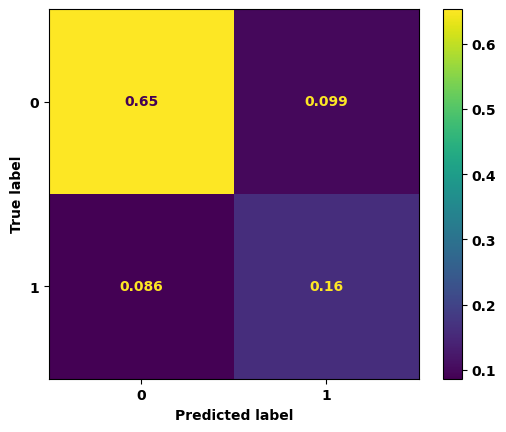

In [520]:
print(confusion_matrix(y_val, y_pred))
ConfusionMatrixDisplay.from_estimator(dt, X_val, y_val, normalize='all')

In [521]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('Val_Set')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print('Train_Set')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [522]:
eval_metric(dt, X_train, y_train, X_val, y_val)

Val_Set
[[3836  583]
 [ 508  946]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4419
           1       0.62      0.65      0.63      1454

    accuracy                           0.81      5873
   macro avg       0.75      0.76      0.75      5873
weighted avg       0.82      0.81      0.82      5873


Train_Set
[[13107     3]
 [    0  4506]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13110
           1       1.00      1.00      1.00      4506

    accuracy                           1.00     17616
   macro avg       1.00      1.00      1.00     17616
weighted avg       1.00      1.00      1.00     17616



### Decision Tree Cross Validaiton

In [523]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train_ = dv.fit_transform(dicts)

    model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train_, y_train_)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [524]:
columns = numerical + categorical

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train_ = df_train['salary']
    y_val_ = df_val['salary']
    
    del df_train['salary']
    del df_val['salary']

    dv, dt_cv = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, dt_cv)

    auc = roc_auc_score(y_val_, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.742 +- 0.005


In [525]:
y_pred = dt_cv.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train_auc:', auc)

y_pred = dt_cv.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val_auc:', auc)

train_auc: 0.9307811806480248
val_auc: 0.9999999221817256


In [526]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv = DecisionTreeClassifier(class_weight='balanced', random_state=42)
cv_results = cross_val_score(dt_cv, X_train, y_train, cv = kfold, scoring = 'roc_auc')
round(np.std(cv_results),3)

0.009

### Decision Tree Hyperparemeter Tuning

In [527]:
scores = []

for depth in tqdm([1, 2, 4, 5, 6, 7, 10, 15, 20]):
    for s in tqdm([1, 2, 5, 10, 15, 20, 50, 100, 200, 500]):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, class_weight='balanced', random_state=42)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [528]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

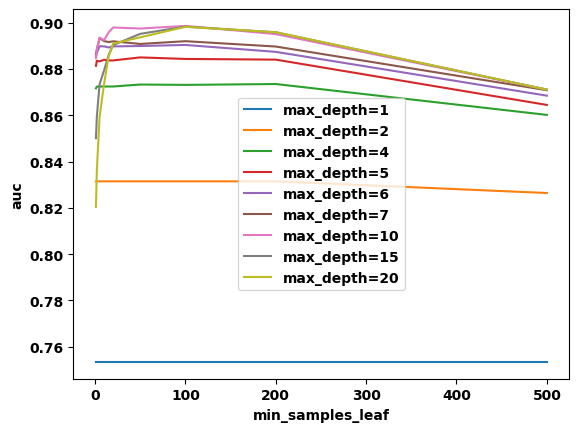

In [529]:
for d in [1, 2, 4, 5, 6, 7, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.min_samples_leaf, df_subset.auc,
             label='max_depth=%d' % d)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('auc')
    plt.legend();

In [530]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth            1      2      4      5      6      7      10     15   
min_samples_leaf                                                           
1                 0.753  0.831  0.872  0.881  0.885  0.886  0.885  0.850   
2                 0.753  0.831  0.872  0.883  0.887  0.888  0.888  0.859   
5                 0.753  0.831  0.872  0.883  0.890  0.893  0.893  0.873   
10                0.753  0.831  0.872  0.884  0.890  0.892  0.892  0.879   
15                0.753  0.831  0.872  0.884  0.889  0.892  0.896  0.886   
20                0.753  0.831  0.872  0.884  0.890  0.892  0.898  0.890   
50                0.753  0.831  0.873  0.885  0.890  0.891  0.897  0.895   
100               0.753  0.831  0.873  0.884  0.890  0.892  0.899  0.898   
200               0.753  0.831  0.873  0.884  0.887  0.890  0.895  0.896   
500               0.753  0.826  0.860  0.864  0.868  0.871  0.871  0.871   

                         
max_depth            20  
min_samples_leaf         
1                 0.820  
2                 0.836  
5                 0.859  
10                0.874  
15                0.885  
20                0.891  
50                0.894  
100               0.898  
200               0.896  
500               0.871

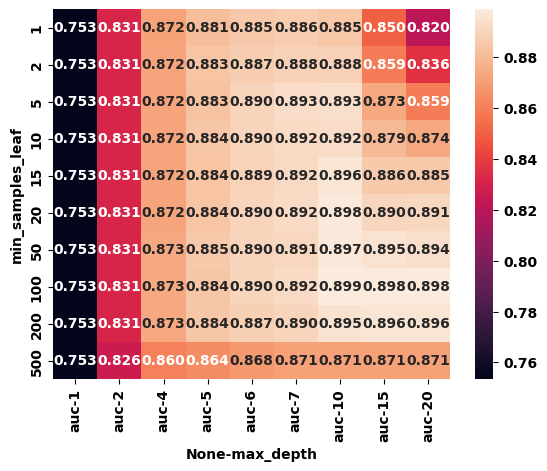

In [531]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f');

In [532]:
# model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, class_weight='balanced', random_state=42)
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
max_depth = [1, 2, 4, 5, 6, 7, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10, 15, 20, 50, 100, 200, 500]

param_grid = {'max_depth' : max_depth,
              'min_samples_leaf' : min_samples_leaf}

cv = StratifiedKFold(n_splits = 5)

dt_gs = GridSearchCV(estimator=model,
                     param_grid=param_grid,
                     cv=cv,
                     scoring = 'roc_auc',
                     n_jobs = -1,
                     return_train_score=True)

dt_gs.fit(X_train, y_train)

print(dt_gs.best_estimator_)
print('-'*25)
print(pd.DataFrame(dt_gs.cv_results_).loc[dt_gs.best_index_, ['mean_test_score', 'mean_train_score']])

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=100, random_state=42)
-------------------------
mean_test_score      0.89726
mean_train_score    0.909453
Name: 87, dtype: object


### Decision Tree Final Model

In [533]:
dt_final = DecisionTreeClassifier(max_depth=20, min_samples_leaf=100, class_weight='balanced', random_state=42)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=100, random_state=42)

In [534]:
y_pred_prob = dt_final.predict_proba(X_val)[:, 1]
y_pred = dt_final.predict(X_val)

In [535]:
dt_accuracy = accuracy_score(y_val, y_pred)
dt_precision = precision_score(y_val, y_pred, pos_label=1)
dt_recall = recall_score(y_val, y_pred, pos_label=1)
dt_f1 = f1_score(y_val, y_pred, pos_label=1)
dt_roc_auc = roc_auc_score(y_val, y_pred_prob)

print('accuracy_score -->', dt_accuracy)
print('precision_score -->', dt_precision)
print('recall_score -->', dt_recall)
print('f1_score -->', dt_f1)
print('roc_auc_score -->', dt_roc_auc)

accuracy_score --> 0.8035075770475055
precision_score --> 0.5706880301602262
recall_score --> 0.8328748280605227
f1_score --> 0.6772930648769575
roc_auc_score --> 0.8981341667981797


### Decision Tree Feature Importance

In [536]:
features = dv.get_feature_names_out()
dt_imp = pd.DataFrame(data = dt_final.feature_importances_, 
                    index=dv.get_feature_names_out(), 
                    columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
dt_imp[:21]

Feature Importance
marital_status=married                0.497959
capital_gain                          0.161920
education=high_level_grade            0.133849
age                                   0.074778
education=low_level_grade             0.036903
hours_per_week                        0.033675
capital_loss                          0.014184
fnlwgt                                0.012209
occupation=Exec-managerial            0.010559
occupation=Other-service              0.010099
occupation=Prof-specialty             0.004389
occupation=Farming-fishing            0.003730
sex=Female                            0.002753
workclass=Private                     0.001245
occupation=Sales                      0.000748
occupation=Craft-repair               0.000455
workclass=Local-gov                   0.000222
sex=Male                              0.000220
race=White                            0.000090
native_country=US                     0.000012
workclass=Federal-gov                 0.000000

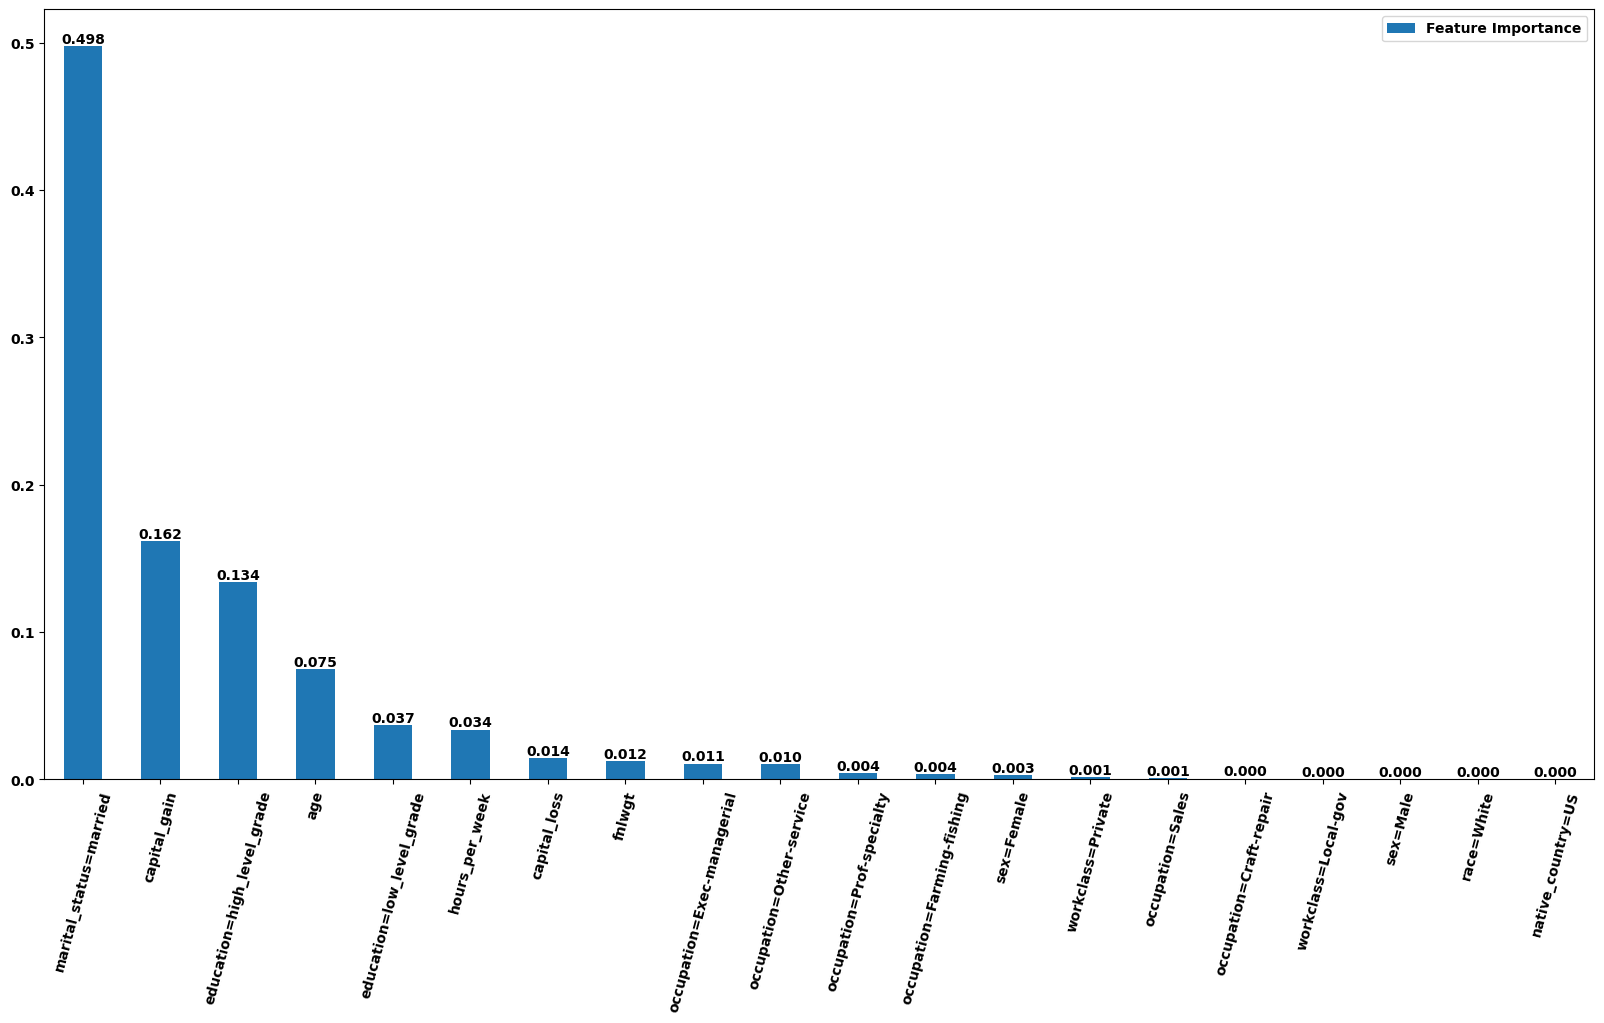

In [537]:
ax = dt_imp[:20].plot(kind='bar', figsize=(20,10))
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 75);

# Random Forest

### Random Forest Training the model

In [538]:
from sklearn.ensemble import RandomForestClassifier

In [539]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [540]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- marital_status=married <= 0.50
|   |--- education=high_level_grade <= 0.50
|   |   |--- hours_per_week <= 43.50
|   |   |   |--- age <= 34.50
|   |   |   |   |--- age <= 26.50
|   |   |   |   |   |--- hours_per_week <= 39.50
|   |   |   |   |   |   |--- fnlwgt <= 172222.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- fnlwgt >  172222.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- hours_per_week >  39.50
|   |   |   |   |   |   |--- age <= 22.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  22.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  26.50
|   |   |   |   |   |--- sex=Male <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- sex=Male >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- age >  34.50
|   |   |   |   |--- sex=Male <= 0.50
|   |   |   |   |   |--- fnlwgt <= 198093.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- f

In [541]:
y_pred_prob = rf.predict_proba(X_val)[:, 1]
y_pred = rf.predict(X_val)

In [542]:
score_accuracy = accuracy_score(y_val, y_pred)
score_precision = precision_score(y_val, y_pred, pos_label=1)
score_recall = recall_score(y_val, y_pred, pos_label=1)
score_f1 = f1_score(y_val, y_pred, pos_label=1)
score_roc_auc = roc_auc_score(y_val, y_pred_prob)

print('accuracy_score -->', score_accuracy)
print('precision_score -->', score_precision)
print('recall_score -->', score_recall)
print('f1_score -->', score_f1)
print('roc_auc_score -->', score_roc_auc)

accuracy_score --> 0.847267154776094
precision_score --> 0.725141471301536
recall_score --> 0.6169188445667125
f1_score --> 0.6666666666666667
roc_auc_score --> 0.8952303000703787


[[4079  340]
 [ 557  897]]


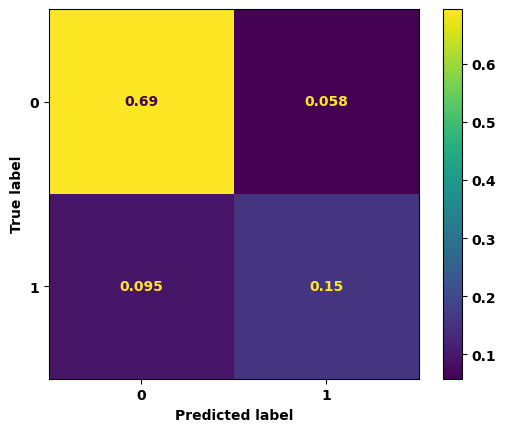

In [543]:
print(confusion_matrix(y_val, y_pred))
ConfusionMatrixDisplay.from_estimator(rf, X_val, y_val, normalize='all')

In [544]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('Val_Set')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print('Train_Set')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [545]:
eval_metric(rf, X_train, y_train, X_val, y_val)

Val_Set
[[4079  340]
 [ 557  897]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4419
           1       0.73      0.62      0.67      1454

    accuracy                           0.85      5873
   macro avg       0.80      0.77      0.78      5873
weighted avg       0.84      0.85      0.84      5873


Train_Set
[[13107     3]
 [    0  4506]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13110
           1       1.00      1.00      1.00      4506

    accuracy                           1.00     17616
   macro avg       1.00      1.00      1.00     17616
weighted avg       1.00      1.00      1.00     17616



### Random Forest Cross Validaiton

In [546]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train_ = dv.fit_transform(dicts)

    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train_, y_train_)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [547]:
columns = numerical + categorical

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train_ = df_train['salary']
    y_val_ = df_val['salary']
    
    del df_train['salary']
    del df_val['salary']

    dv, rf_cv = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, rf_cv)

    auc = roc_auc_score(y_val_, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.897 +- 0.003


In [548]:
y_pred = rf_cv.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train_auc:', auc)

y_pred = rf_cv.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val_auc:', auc)

train_auc: 0.9829019481779189
val_auc: 0.9999980545431397


In [549]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = RandomForestClassifier(class_weight='balanced', random_state=42)
cv_results = cross_val_score(rf_cv, X_train, y_train, cv = kfold, scoring = 'roc_auc')
round(np.std(cv_results),3)

0.002

### Random Forest Hyperparemeter Tuning

In [550]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=42,
                                    class_weight='balanced')
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [551]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

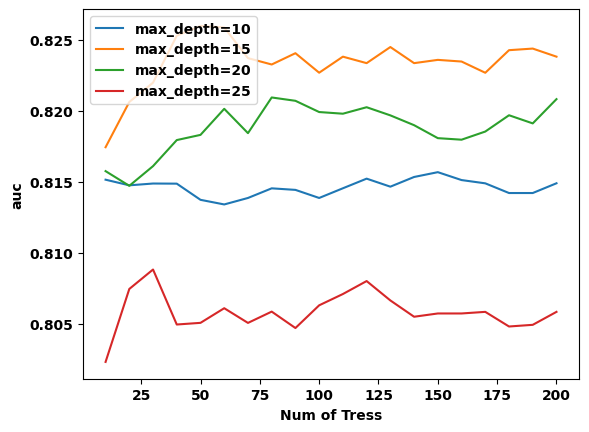

In [552]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)
    plt.xlabel('Num of Tress')
    plt.ylabel('auc')
    plt.legend();

In [553]:
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth        10     15     20     25
n_estimators                            
10            0.815  0.817  0.816  0.802
20            0.815  0.821  0.815  0.807
30            0.815  0.822  0.816  0.809
40            0.815  0.825  0.818  0.805
50            0.814  0.826  0.818  0.805
60            0.813  0.826  0.820  0.806
70            0.814  0.824  0.818  0.805
80            0.815  0.823  0.821  0.806
90            0.814  0.824  0.821  0.805
100           0.814  0.823  0.820  0.806
110           0.815  0.824  0.820  0.807
120           0.815  0.823  0.820  0.808
130           0.815  0.825  0.820  0.807
140           0.815  0.823  0.819  0.805
150           0.816  0.824  0.818  0.806
160           0.815  0.823  0.818  0.806
170           0.815  0.823  0.819  0.806
180           0.814  0.824  0.820  0.805
190           0.814  0.824  0.819  0.805
200           0.815  0.824  0.821  0.806

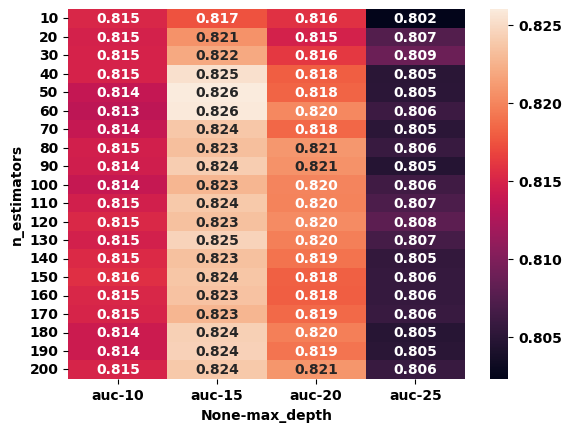

In [554]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f');

In [555]:
# model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, class_weight='balanced', random_state=42)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
max_depth = [1, 2, 4, 5, 6, 7, 10, 15, 20]
n_estimators = [n for n in range(10, 201, 10)]

param_grid = {'max_depth' : max_depth,
              'n_estimators' : n_estimators}

cv = StratifiedKFold(n_splits = 5)

rf_gs = GridSearchCV(estimator=model,
                     param_grid=param_grid,
                     cv=cv,
                     scoring = 'roc_auc',
                     n_jobs = -1,
                     return_train_score=True)

rf_gs.fit(X_train, y_train)

print(rf_gs.best_estimator_)
print('-'*25)
print(pd.DataFrame(rf_gs.cv_results_).loc[rf_gs.best_index_, ['mean_test_score', 'mean_train_score']])

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=130,
                       random_state=42)
-------------------------
mean_test_score     0.909421
mean_train_score    0.961525
Name: 152, dtype: object


### Random Forest Final Model

In [556]:
rf_final = RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=130, random_state=42)
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=130,
                       random_state=42)

In [557]:
y_pred_prob = rf_final.predict_proba(X_val)[:, 1]
y_pred = rf_final.predict(X_val)

In [558]:
rf_accuracy = accuracy_score(y_val, y_pred)
rf_precision = precision_score(y_val, y_pred, pos_label=1)
rf_recall = recall_score(y_val, y_pred, pos_label=1)
rf_f1 = f1_score(y_val, y_pred, pos_label=1)
rf_roc_auc = roc_auc_score(y_val, y_pred_prob)

print('accuracy_score -->', rf_accuracy)
print('precision_score -->', rf_precision)
print('recall_score -->', rf_recall)
print('f1_score -->', rf_f1)
print('roc_auc_score -->', rf_roc_auc)

accuracy_score --> 0.8161076111016516
precision_score --> 0.5902509652509652
recall_score --> 0.8411279229711142
f1_score --> 0.6937039137833239
roc_auc_score --> 0.9113673199977713


### Random Forest Feature Importance

In [559]:
features = dv.get_feature_names_out()
rf_imp = pd.DataFrame(data = rf_final.feature_importances_, 
                      index=dv.get_feature_names_out(), 
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
rf_imp

Feature Importance
marital_status=married                    0.150253
marital_status=unmarried                  0.145855
age                                       0.120023
capital_gain                              0.111730
education=high_level_grade                0.073647
hours_per_week                            0.064419
fnlwgt                                    0.052979
education=low_level_grade                 0.028673
capital_loss                              0.028493
sex=Female                                0.028398
education=medium_level_grade              0.026020
occupation=Exec-managerial                0.022356
occupation=Other-service                  0.018104
sex=Male                                  0.016403
occupation=Prof-specialty                 0.015553
workclass=Private                         0.008157
workclass=Self-emp-not-inc                0.006261
occupation=Handlers-cleaners              0.005325
race=White                                0.005140
occupation=Farming-fishing                0.005045
workclass=Self-emp-inc                    0.004643
occupation=Craft-repair                   0.004604
occupation=Adm-clerical                   0.004465
workclass=Local-gov                       0.004336
occupation=Sales                          0.004313
race=Black                                0.004302
native_country=US                         0.004194
occupation=Machine-op-inspct              0.004017
workclass=Federal-gov                     0.003665
occupation=Tech-support                   0.003291
occupation=Transport-moving               0.003126
workclass=State-gov                       0.003021
occupation=Protective-serv                0.002661
race=Asian-Pac-Islander                   0.002596
native_country=North America              0.002491
native_country=Europe                     0.001990
native_country=South East Asia            0.001498
race=Amer-Indian-Eskimo                   0.001327
native_country=Caribbean                  0.001214
native_country=Great Britain              0.000917
native_country=Korea&Japan                0.000903
native_country=Mid America                0.000800
native_country=Asia                       0.000717
race=Other                                0.000615
native_country=South America              0.000577
native_country=China                      0.000513
occupation=Priv-house-serv                0.000253
workclass=Without-pay                     0.000107
occupation=Armed-Forces                   0.000008

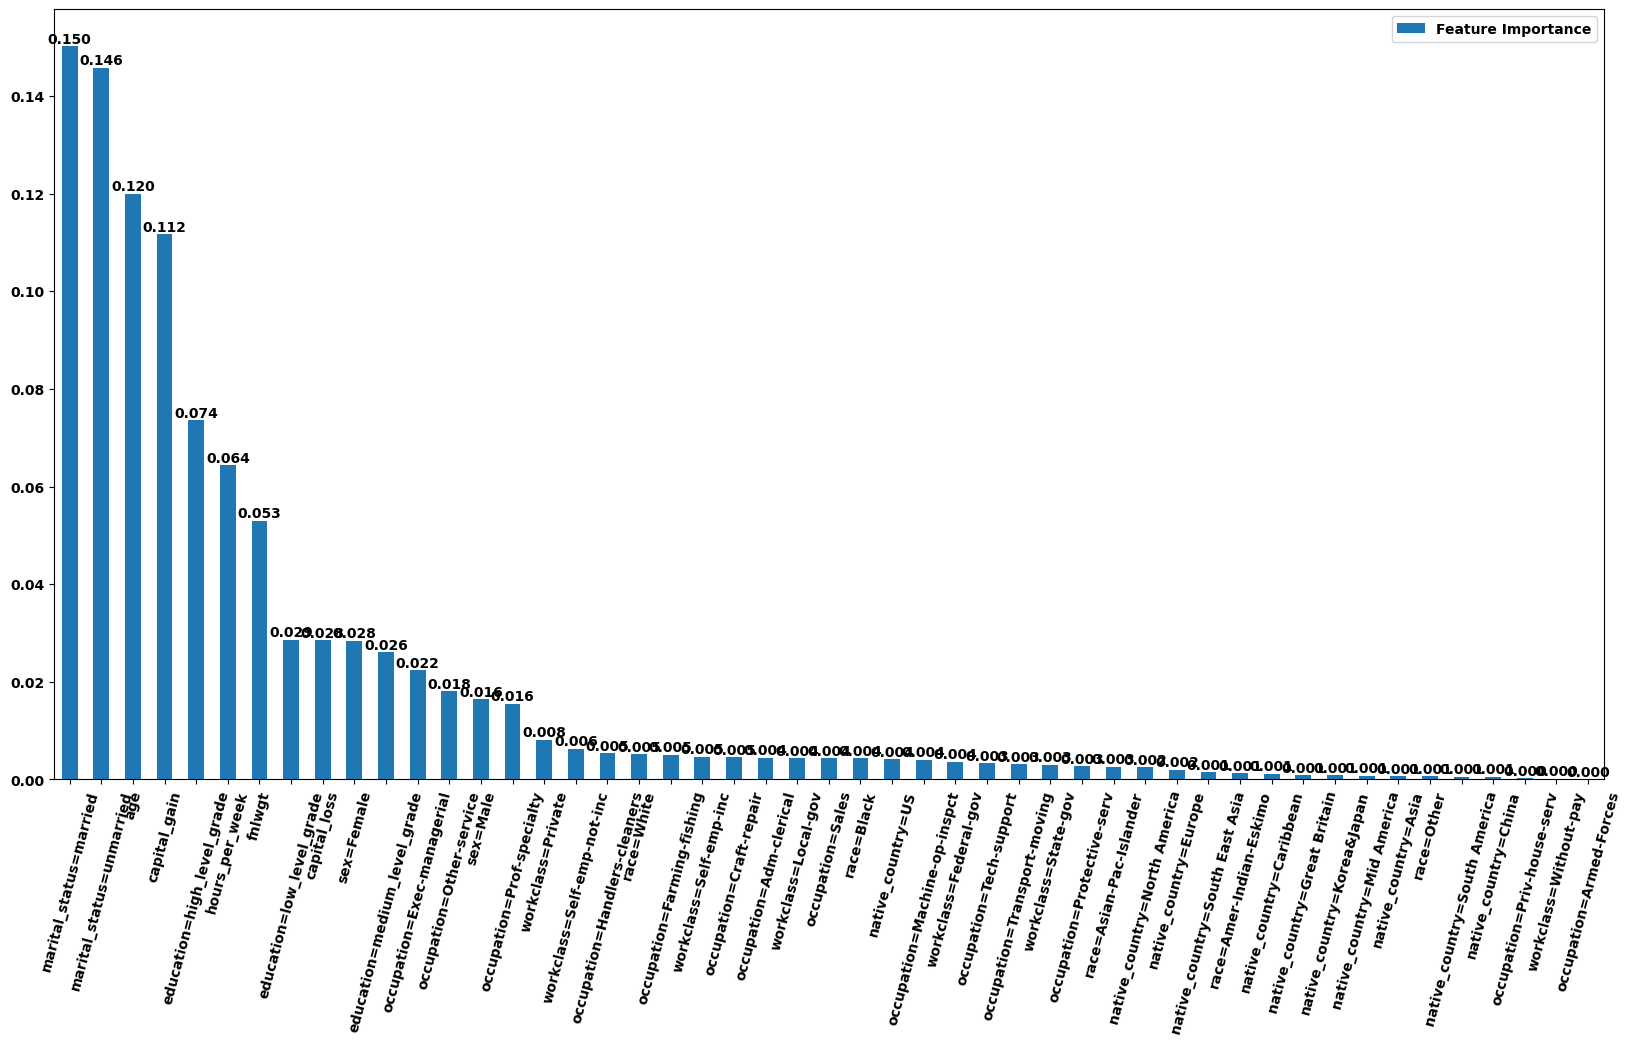

In [560]:
ax = rf_imp.plot(kind='bar', figsize=(20,10))
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 75);

# XGBoost

### XGBoost Training the model

In [561]:
import xgboost as xgb

In [562]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [563]:
xgb_params = {'eta': 0.3, 
              'max_depth': 6,
              'min_child_weight': 1,
              'objective': 'binary:logistic',
              'nthread': 8,
              'seed': 42,
              'verbosity': 1,
              'scale_pos_weight' : 3
             }

xgboost = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [564]:
y_pred = xgboost.predict(dval)

In [565]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

threshold = 0.5
predict_positive = (y_pred >= threshold)
predict_negative = (y_pred < threshold)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [566]:
score_accuracy = (tp+tn)/(tp+tn+fp+fn)
score_precision = tp / (tp + fp)
score_recall = tp / (tp + fn)
score_f1 = 2 * (score_precision * score_recall) / (score_precision + score_recall)
score_roc_auc = roc_auc_score(y_val, y_pred)

print('accuracy_score -->', score_accuracy)
print('precision_score -->', score_precision)
print('recall_score -->', score_recall)
print('f1_score -->', score_f1)
print('roc_auc_score -->', score_roc_auc)

accuracy_score --> 0.8327941426868721
precision_score --> 0.6194331983805668
recall_score --> 0.8418156808803301
f1_score --> 0.7137026239067056
roc_auc_score --> 0.9172868004954222


In [567]:
confusion_matrix = np.array([
                             [tn, fp],
                             [fn, tp]
                            ])
print(confusion_matrix)
print('---'*5)
print((confusion_matrix / confusion_matrix.sum()).round(2))

[[3667  752]
 [ 230 1224]]
---------------
[[0.62 0.13]
 [0.04 0.21]]


### XGBoost Hyperparemeter Tuning

In [568]:
y_pred = xgboost.predict(dval)
roc_auc_score(y_val, y_pred)

0.9172868004954222

In [569]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [570]:
%%capture output

xgb_params = {'eta': 0.3, 
              'max_depth': 6,
              'min_child_weight': 1,
              
              'objective': 'binary:logistic',
              'eval_metric': 'auc',
              
              'nthread': 8,
              'seed': 42,
              'verbosity': 1,
              'scale_pos_weight' : 3
             }

xgboost = xgb.train(xgb_params, 
                    dtrain, 
                    num_boost_round=200,
                    verbose_eval=5,
                    evals=watchlist)

In [571]:
s = output.stdout

In [572]:
print(s[:200])

[0]	train-auc:0.89471	val-auc:0.89035
[5]	train-auc:0.91794	val-auc:0.91058
[10]	train-auc:0.92699	val-auc:0.91597
[15]	train-auc:0.93329	val-auc:0.91886
[20]	train-auc:0.93764	val-auc:0.92036
[25]	tr


In [573]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [574]:
df_score = parse_xgb_output(output)
df_score

num_iter  train_auc  val_auc
0          0    0.89471  0.89035
1          5    0.91794  0.91058
2         10    0.92699  0.91597
3         15    0.93329  0.91886
4         20    0.93764  0.92036
5         25    0.94104  0.92158
6         30    0.94372  0.92145
7         35    0.94618  0.92148
8         40    0.94859  0.92119
9         45    0.94994  0.92125
10        50    0.95342  0.92027
11        55    0.95514  0.91969
12        60    0.95594  0.91979
13        65    0.95793  0.91899
14        70    0.95846  0.91897
15        75    0.95972  0.91856
16        80    0.96146  0.91817
17        85    0.96382  0.91758
18        90    0.96436  0.91761
19        95    0.96545  0.91769
20       100    0.96723  0.91734
21       105    0.96838  0.91649
22       110    0.96994  0.91569
23       115    0.97179  0.91514
24       120    0.97287  0.91492
25       125    0.97387  0.91478
26       130    0.97501  0.91453
27       135    0.97598  0.91463
28       140    0.97689  0.91388
29       145    0.97811  0.91324
30       150    0.97863  0.91324
31       155    0.97928  0.91308
32       160    0.97978  0.91291
33       165    0.98043  0.91271
34       170    0.98103  0.91266
35       175    0.98149  0.91245
36       180    0.98188  0.91235
37       185    0.98251  0.91208
38       190    0.98338  0.91210
39       195    0.98467  0.91222
40       199    0.98499  0.91212

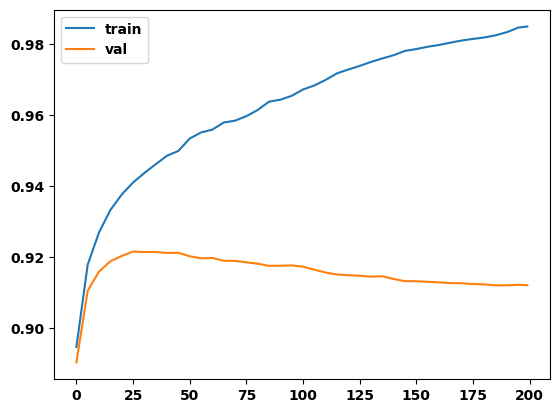

In [575]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend();

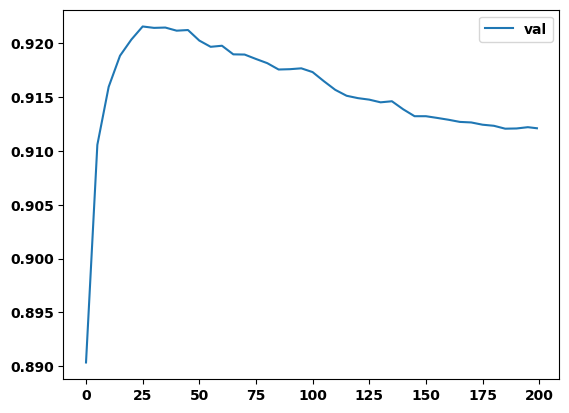

In [576]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend();

**eta**

In [577]:
scores = {} #Try for different eta values --> 'eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'

In [578]:
%%capture output

xgb_params = {
                'eta': 1.0, 
                'max_depth': 6,
                'min_child_weight': 1,

                'objective': 'binary:logistic',
                'eval_metric': 'auc',

                'nthread': 8,
                'seed': 42,
                'verbosity': 1,
                'scale_pos_weight': 3
            }

xgboost = xgb.train(xgb_params, 
                    dtrain, 
                    num_boost_round=200,
                    verbose_eval=5,
                    evals=watchlist)

In [579]:
'eta=%s' % (xgb_params['eta'])

'eta=1.0'

In [580]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [581]:
scores
# scores['eta=0.01']

{'eta=1.0':     num_iter  train_auc  val_auc
 0          0    0.89471  0.89035
 1          5    0.93321  0.90910
 2         10    0.94365  0.91193
 3         15    0.94954  0.90878
 4         20    0.95662  0.90784
 5         25    0.96258  0.90579
 6         30    0.96760  0.90366
 7         35    0.96979  0.90267
 8         40    0.97353  0.90144
 9         45    0.97669  0.89961
 10        50    0.97977  0.89765
 11        55    0.98246  0.89820
 12        60    0.98453  0.89769
 13        65    0.98595  0.89803
 14        70    0.98790  0.89724
 15        75    0.98998  0.89608
 16        80    0.99088  0.89709
 17        85    0.99161  0.89707
 18        90    0.99278  0.89589
 19        95    0.99371  0.89521
 20       100    0.99454  0.89423
 21       105    0.99508  0.89429
 22       110    0.99596  0.89334
 23       115    0.99650  0.89293
 24       120    0.99687  0.89228
 25       125    0.99719  0.89253
 26       130    0.99767  0.89251
 27       135    0.99813  0.89270
 28

In [582]:
scores.keys()

dict_keys(['eta=1.0'])

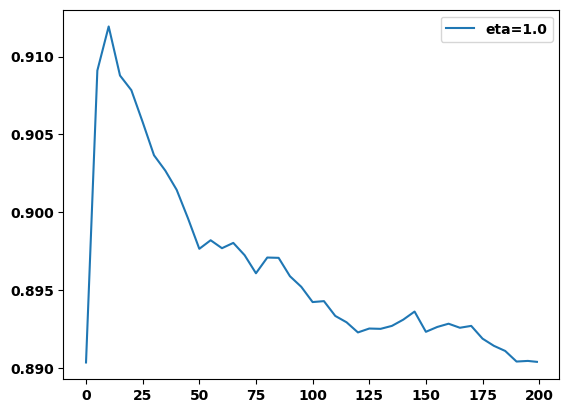

In [583]:
for key, df_score in scores.items() :
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    plt.legend();

In [584]:
etas = ['eta=0.05', 'eta=0.1']

for eta in etas :
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    plt.legend()

KeyError: 'eta=0.05'

Best eta value --> 0.1

**max_depth**

In [585]:
scores = {} # Try for different max_depth values --> 'max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=10', 'max_depth=20'

In [586]:
%%capture output

xgb_params = {
                'eta': 0.05, 
                'max_depth': 20,
                'min_child_weight': 1,

                'objective': 'binary:logistic',
                'eval_metric': 'auc',

                'nthread': 8,
                'seed': 42,
                'verbosity': 1,
                'scale_pos_weight': 3
            }

xgboost = xgb.train(xgb_params, 
                    dtrain, 
                    num_boost_round=200,
                    verbose_eval=5,
                    evals=watchlist)

In [587]:
'max_depth=%s' % (xgb_params['max_depth'])

'max_depth=20'

In [588]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=20'

In [589]:
scores
# scores['max_depth=3']

{'max_depth=20':     num_iter  train_auc  val_auc
 0          0    0.95685  0.89092
 1          5    0.96588  0.89715
 2         10    0.97191  0.89991
 3         15    0.97582  0.90117
 4         20    0.98010  0.90185
 5         25    0.98342  0.90192
 6         30    0.98690  0.90221
 7         35    0.98858  0.90266
 8         40    0.99065  0.90294
 9         45    0.99176  0.90383
 10        50    0.99232  0.90468
 11        55    0.99286  0.90540
 12        60    0.99338  0.90598
 13        65    0.99426  0.90649
 14        70    0.99481  0.90657
 15        75    0.99511  0.90711
 16        80    0.99559  0.90768
 17        85    0.99594  0.90787
 18        90    0.99606  0.90818
 19        95    0.99618  0.90850
 20       100    0.99630  0.90884
 21       105    0.99642  0.90913
 22       110    0.99656  0.90938
 23       115    0.99671  0.90956
 24       120    0.99695  0.90953
 25       125    0.99722  0.90956
 26       130    0.99747  0.90960
 27       135    0.99762  0.9094

In [590]:
scores.keys()

dict_keys(['max_depth=20'])

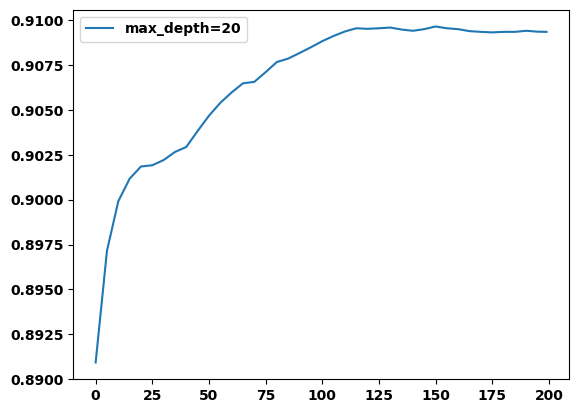

In [591]:
for key, df_score in scores.items() :
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    plt.legend();

In [592]:
max_depths = ['max_depth=4', 'max_depth=6', 'max_depth=10']

for max_depth in max_depths :
    df_score = scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
    plt.legend()

KeyError: 'max_depth=4'

In [ ]:
max_depths = ['max_depth=4', 'max_depth=6', 'max_depth=10']

for max_depth in max_depths :
    df_score = scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
    plt.ylim(0.825, 0.925)
    plt.legend()

Best max_depth value --> 6

**min_child_weight**

In [593]:
scores = {} # Try for different min_child_weight values --> 'min_child_weight=1, 5, 10, 20, 30'

In [594]:
%%capture output

xgb_params = {
                'eta': 0.05, 
                'max_depth': 6,
                'min_child_weight': 30,

                'objective': 'binary:logistic',
                'eval_metric': 'auc',

                'nthread': 8,
                'seed': 42,
                'verbosity': 1,
                'scale_pos_weight': 3
            }

xgboost = xgb.train(xgb_params, 
                    dtrain, 
                    num_boost_round=200,
                    verbose_eval=5,
                    evals=watchlist)

In [595]:
'min_child_weight=%s' % (xgb_params['min_child_weight'])

'min_child_weight=30'

In [596]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [597]:
scores
# scores['min_child_weight=1']

{'min_child_weight=30':     num_iter  train_auc  val_auc
 0          0    0.89190  0.89027
 1          5    0.89926  0.89651
 2         10    0.90175  0.89951
 3         15    0.90348  0.90109
 4         20    0.90541  0.90322
 5         25    0.90775  0.90453
 6         30    0.90966  0.90618
 7         35    0.91084  0.90709
 8         40    0.91175  0.90778
 9         45    0.91261  0.90816
 10        50    0.91437  0.90927
 11        55    0.91539  0.90972
 12        60    0.91636  0.91036
 13        65    0.91699  0.91085
 14        70    0.91777  0.91114
 15        75    0.91860  0.91174
 16        80    0.91944  0.91203
 17        85    0.92012  0.91242
 18        90    0.92101  0.91317
 19        95    0.92175  0.91357
 20       100    0.92245  0.91383
 21       105    0.92300  0.91407
 22       110    0.92353  0.91421
 23       115    0.92396  0.91446
 24       120    0.92446  0.91468
 25       125    0.92501  0.91501
 26       130    0.92563  0.91540
 27       135    0.92619 

In [598]:
scores.keys()

dict_keys(['min_child_weight=30'])

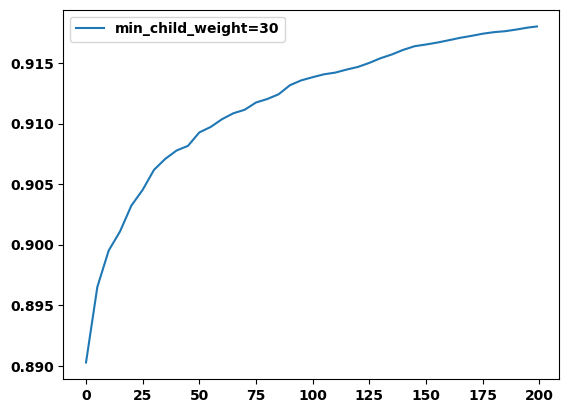

In [599]:
for key, df_score in scores.items() :
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    plt.legend();

In [600]:
min_child_weights = ['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10']

for min_child_weight in min_child_weights :
    df_score = scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
    plt.legend()

KeyError: 'min_child_weight=1'

Best min_child_weight value --> 5

### XGBoost Final Model

In [601]:
xgb_params = { 'eta': 0.05, 
               'max_depth': 6,
               'min_child_weight': 5,
    
               'objective': 'binary:logistic',
               'eval_metric': 'auc',

               'nthread': 8,
               'seed': 42,
               'verbosity': 1,
               'scale_pos_weight': 3
             }

xgb_final = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [602]:
y_pred = xgb_final.predict(dval)

In [603]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

threshold = 0.5
predict_positive = (y_pred >= threshold)
predict_negative = (y_pred < threshold)

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [604]:
xgb_accuracy = (tp+tn)/(tp+tn+fp+fn)
xgb_precision = tp / (tp + fp)
xgb_recall = tp / (tp + fn)
xgb_f1 = 2 * (score_precision * score_recall) / (score_precision + score_recall)
xgb_roc_auc = roc_auc_score(y_val, y_pred)

print('accuracy_score -->', xgb_accuracy)
print('precision_score -->', xgb_precision)
print('recall_score -->', xgb_recall)
print('f1_score -->', xgb_f1)
print('roc_auc_score -->', xgb_roc_auc)

accuracy_score --> 0.8205346500936489
precision_score --> 0.5943396226415094
recall_score --> 0.8665749656121046
f1_score --> 0.7137026239067056
roc_auc_score --> 0.921617932194136


In [605]:
confusion_matrix = np.array([
                             [tn, fp],
                             [fn, tp]
                            ])
print(confusion_matrix)
print('---'*5)
print((confusion_matrix / confusion_matrix.sum()).round(2))

[[3559  860]
 [ 194 1260]]
---------------
[[0.61 0.15]
 [0.03 0.21]]


### XGBoost Feature Importance

In [606]:
feature_important = xgb_final.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

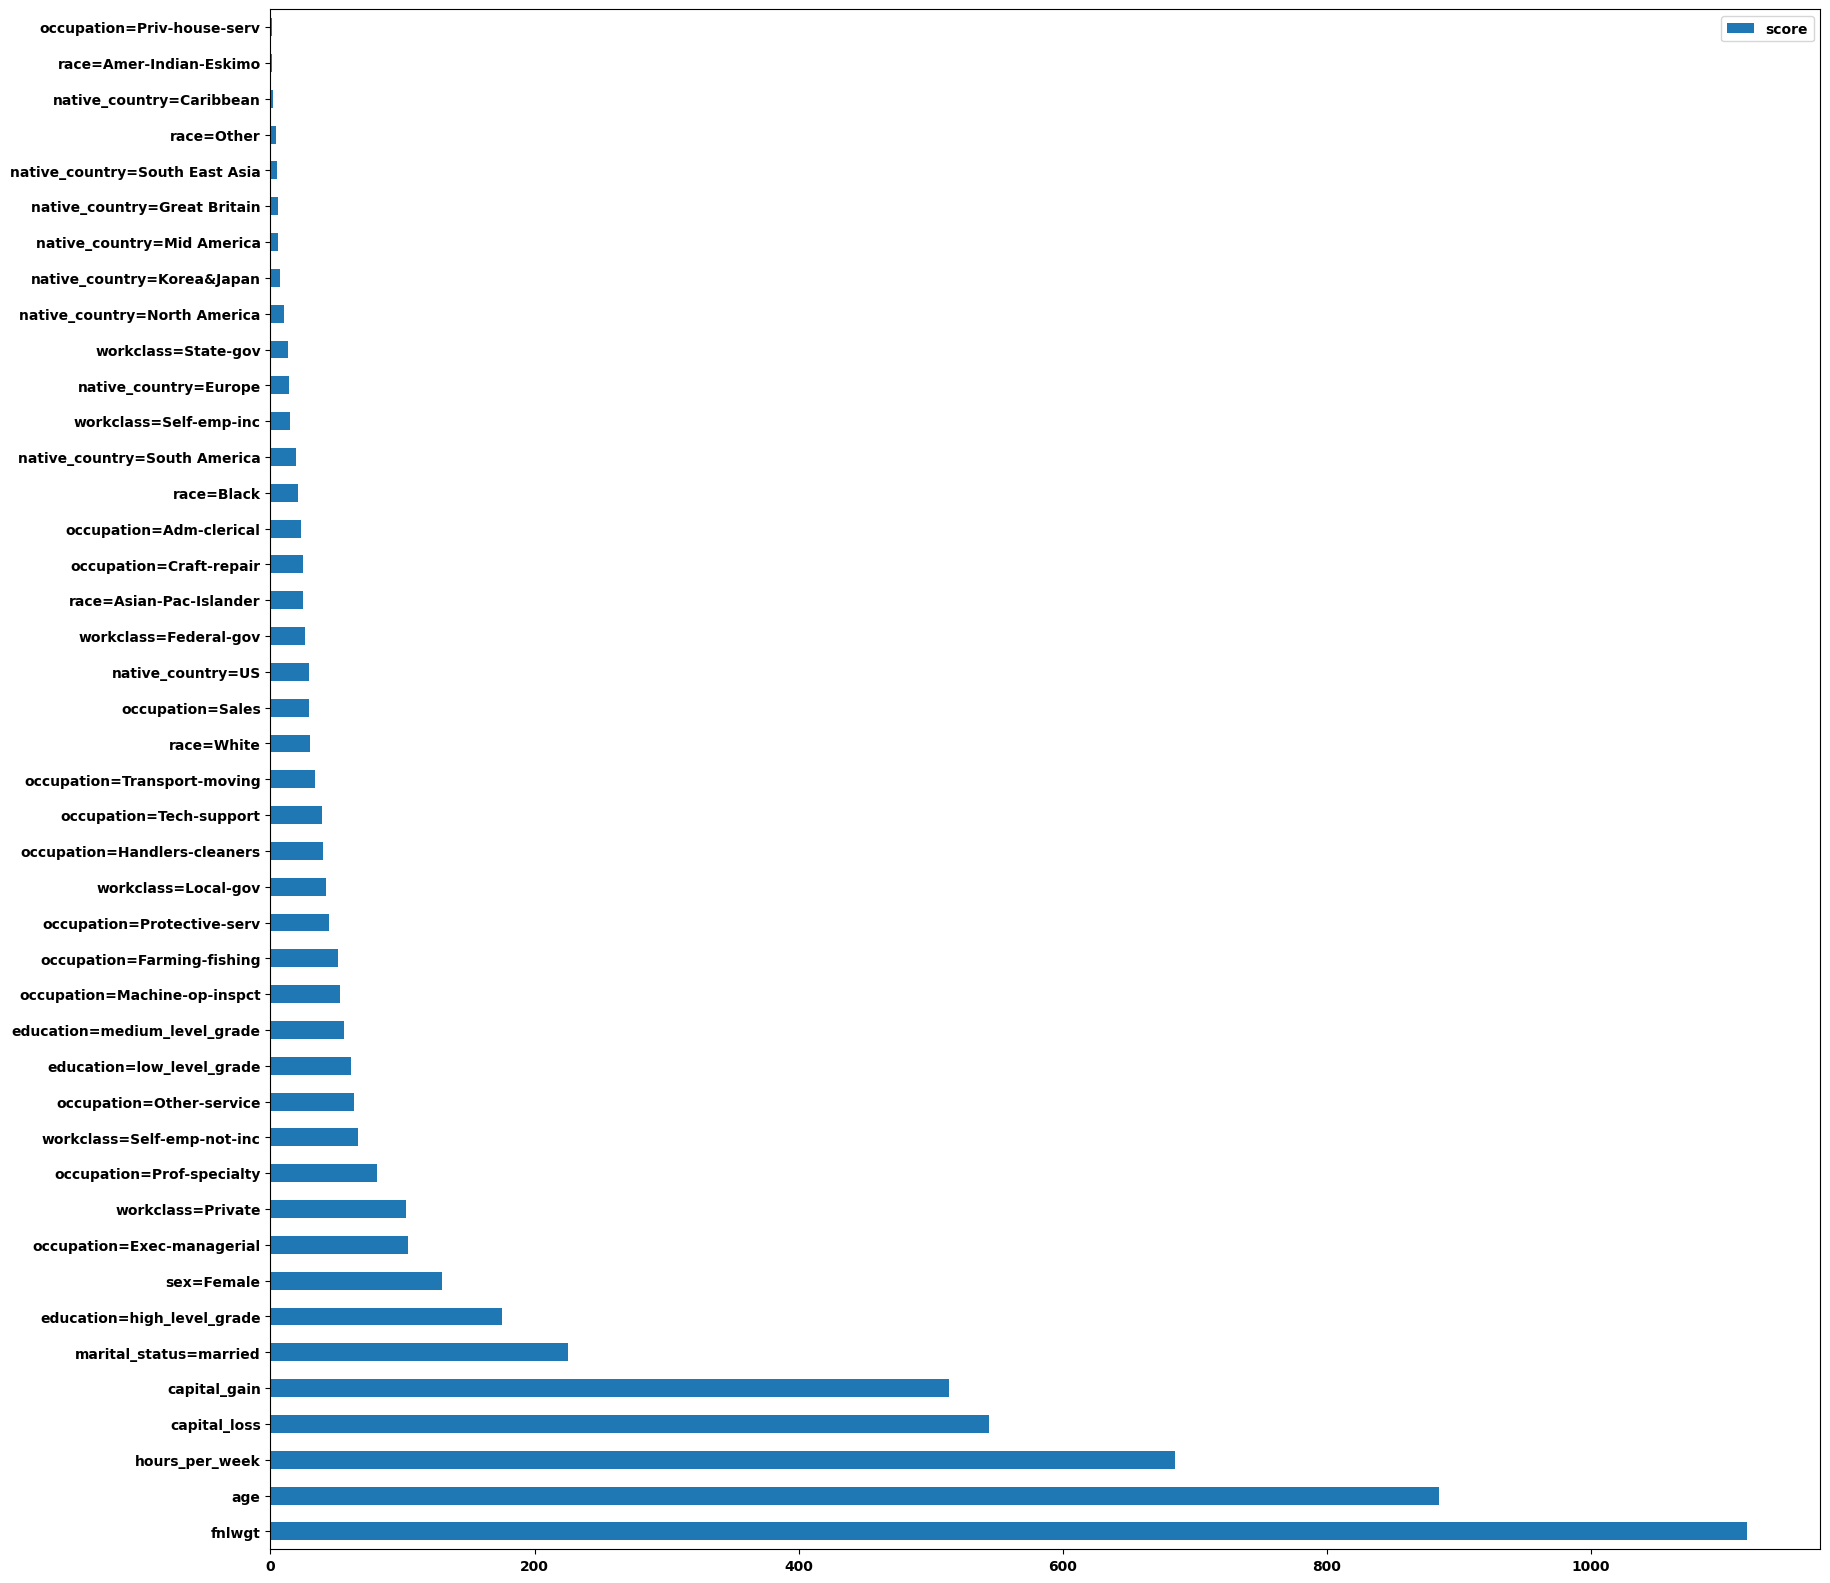

In [608]:
xgb_imp = pd.DataFrame(data=values, index=keys, columns=["score"])
xgb_imp.nlargest(43, columns="score").plot(kind='barh', figsize = (20,20));

# Final Model

### Comparison of models

In [609]:
compare = pd.DataFrame({'Model': ['LogReg_model', 'DT_model', 'RF_model', 'XGB_model'],
                        'Accuracy_Score': [log_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy],
                        'Precision_Score': [log_precision, dt_precision, rf_precision, xgb_precision],
                        'F1_Score': [log_f1, dt_f1, rf_f1, xgb_f1],
                        'Recall_Score': [log_recall, dt_recall, rf_recall, xgb_recall],
                        'ROC_AUC_Score': [log_roc_auc, dt_roc_auc, rf_roc_auc, xgb_roc_auc]})

compare = compare.sort_values(by='Accuracy_Score', ascending=True)
fig = px.bar(compare, x = 'Accuracy_Score', y = 'Model', title = 'Accuracy_Score')
fig.show()

compare = compare.sort_values(by='Precision_Score', ascending=True)
fig = px.bar(compare, x = 'Precision_Score', y = 'Model', title = 'Precision_Score')
fig.show()

compare = compare.sort_values(by='F1_Score', ascending=True)
fig = px.bar(compare, x = 'F1_Score', y = 'Model', title = 'F1_Score')
fig.show()

compare = compare.sort_values(by='Recall_Score', ascending=True)
fig = px.bar(compare, x = 'Recall_Score', y = 'Model', title = 'Recall_Score')
fig.show()

compare = compare.sort_values(by='ROC_AUC_Score', ascending=True)
fig = px.bar(compare, x = 'ROC_AUC_Score', y = 'Model', title = 'ROC_AUC_Score')
fig.show()

In [610]:
compare.T

1             0         2          3
Model            DT_model  LogReg_model  RF_model  XGB_model
Accuracy_Score   0.803508      0.803167  0.816108   0.820535
Precision_Score  0.570688      0.570085  0.590251    0.59434
F1_Score         0.677293      0.677095  0.693704   0.713703
Recall_Score     0.832875      0.833563  0.841128   0.866575
ROC_AUC_Score    0.898134       0.89819  0.911367   0.921618

### Selecting the final model

In [617]:
def train(df_full_train, y_full_train):
    dicts = df_full_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_full_train = dv.fit_transform(dicts)

    model = RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=130, random_state=42)
    model.fit(X_full_train, y_full_train)

    return dv, model

def predict(df, dv, model):
    dicts = df_test[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [612]:
df_full_train = df_full_train.reset_index(drop=True)

In [613]:
y_full_train = df_full_train.salary.values

In [614]:
del df_full_train['salary']

In [ ]:
# dicts_full_train = df_full_train.to_dict(orient='records')

# dv = DictVectorizer(sparse=False)
# X_full_train = dv.fit_transform(dicts_full_train)

# dicts_test = df_test.to_dict(orient='records')
# X_test = dv.transform(dicts_test)

In [618]:
dv, model = train(df_full_train, y_full_train)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.9100596943292252

In [622]:
final_accuracy = accuracy_score(y_test, y_pred>=0.5)
final_precision = precision_score(y_test, y_pred>=0.5)
final_recall = recall_score(y_test, y_pred>=0.5)
final_f1 = f1_score(y_test, y_pred>=0.5)
final_roc_auc = roc_auc_score(y_test, y_pred)

print('accuracy_score -->', final_accuracy)
print('precision_score -->', final_precision)
print('recall_score -->', final_recall)
print('f1_score -->', final_f1)
print('roc_auc_score -->', final_roc_auc)

accuracy_score --> 0.8210454622850332
precision_score --> 0.5992179863147605
recall_score --> 0.8414550446122169
f1_score --> 0.6999714530402512
roc_auc_score --> 0.9100596943292252


## Save the model

In [623]:
import pickle

In [624]:
output_file = 'model_rf'
output_file

'model_rf'

In [625]:
f_out = open(output_file, 'wb')
pickle.dump((dv, model), f_out)
f_out.close()

In [628]:
with open(model_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

## Load the model

In [630]:
import pickle

In [626]:
model_file = 'model_rf'

In [632]:
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [633]:
dv, model

(DictVectorizer(sparse=False),
 RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=130,
                        random_state=42))

In [635]:
df.sample(1).to_dict()

{'age': {22204: 41},
 'workclass': {22204: 'Self-emp-inc'},
 'fnlwgt': {22204: 236021},
 'education': {22204: 'high_level_grade'},
 'marital_status': {22204: 'married'},
 'occupation': {22204: 'Prof-specialty'},
 'race': {22204: 'White'},
 'sex': {22204: 'Male'},
 'capital_gain': {22204: 15024},
 'capital_loss': {22204: 0},
 'hours_per_week': {22204: 40},
 'native_country': {22204: 'US'},
 'salary': {22204: 1}}

In [636]:
sample = {'age': 41,
          'workclass': 'Self-emp-inc',
          'fnlwgt': 236021,
          'education': 'high_level_grade',
          'marital_status': 'married',
          'occupation': 'Prof-specialty',
          'race': 'White',
          'sex': 'Male',
          'capital_gain': 15024,
          'capital_loss': 0,
          'hours_per_week': 40,
          'native_country': 'US'
          }

In [ ]:
# dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
#                     feature_names=dv.get_feature_names_out())

# dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [ ]:
# xgb_params = { 'eta': 0.1, 
#                'max_depth': 6,
#                'min_child_weight': 5,
    
#                'objective': 'binary:logistic',
#                'eval_metric': 'auc',

#                'nthread': 8,
#                'seed': 42,
#                'verbosity': 1,
#                'scale_pos_weight': 3
#              }

# final_model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [ ]:
# y_pred = final_model.predict(dtest)

In [ ]:
# final_accuracy = (tp+tn)/(tp+tn+fp+fn)
# final_precision = tp / (tp + fp)
# final_recall = tp / (tp + fn)
# final_f1 = 2 * (score_precision * score_recall) / (score_precision + score_recall)
# final_roc_auc = roc_auc_score(y_test, y_pred)

# print('accuracy_score -->', final_accuracy)
# print('precision_score -->', final_precision)
# print('recall_score -->', final_recall)
# print('f1_score -->', final_f1)
# print('roc_auc_score -->', final_roc_auc)